In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import xticks
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [4]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [6]:
!unzip /content/drive/MyDrive/helpinternational.zip -d NGO

Archive:  /content/drive/MyDrive/helpinternational.zip
  inflating: NGO/Country-data.csv    
  inflating: NGO/data-dictionary.csv  


**Data Loading**

In [7]:
ngo= pd.read_csv('/content/NGO/Country-data.csv')
ngo.head()

country  child_mort  exports  health  imports  income  \
0  Afghanistan          90.2        10.0     7.58    44.9     1610     
1  Albania              16.6        28.0     6.55    48.6     9930     
2  Algeria              27.3        38.4     4.17    31.4     12900    
3  Angola               119.0       62.3     2.85    42.9     5900     
4  Antigua and Barbuda  10.3        45.5     6.03    58.9     19100    

   inflation  life_expec  total_fer   gdpp  
0  9.44       56.2        5.82       553    
1  4.49       76.3        1.65       4090   
2  16.10      76.5        2.89       4460   
3  22.40      60.1        6.16       3530   
4  1.44       76.8        2.13       12200

In [8]:
word=pd.read_csv('/content/NGO/data-dictionary.csv')
word.head(len(word))

Column Name  \
0  country      
1  child_mort   
2  exports      
3  health       
4  imports      
5  Income       
6  Inflation    
7  life_expec   
8  total_fer    
9  gdpp         

                                                                                                        Description  
0  Name of the country                                                                                               
1  Death of children under 5 years of age per 1000 live births                                                       
2  Exports of goods and services per capita. Given as %age of the GDP per capita                                     
3  Total health spending per capita. Given as %age of GDP per capita                                                 
4  Imports of goods and services per capita. Given as %age of the GDP per capita                                     
5  Net income per person                                                                                             
6  The measurement of the annual growth rate of the Total GDP                                                        
7  The average number of years a new born child would live if the current mortality patterns are to remain the same  
8  The number of children that would be born to each woman if the current age-fertility rates remain the same.       
9  The GDP per capita. Calculated as the Total GDP divided by the total population.

In [11]:
ngo.shape

(167, 10)

In [9]:
ngo_dub = ngo.copy()

# Checking for duplicates and dropping the entire duplicate row if any
ngo_dub.drop_duplicates(subset=None, inplace=True)

In [10]:
ngo_dub.shape

(167, 10)

No duplicates are there

In [12]:
ngo.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000  167.000000      
mean   38.270060   41.108976   6.815689    46.890215   17144.688623    
std    40.328931   27.412010   2.746837    24.209589   19278.067698    
min    2.600000    0.109000    1.810000    0.065900    609.000000      
25%    8.250000    23.800000   4.920000    30.200000   3355.000000     
50%    19.300000   35.000000   6.320000    43.300000   9960.000000     
75%    62.100000   51.350000   8.600000    58.750000   22800.000000    
max    208.000000  200.000000  17.900000   174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000  167.000000     
mean   7.781832    70.555689   2.947964    12964.155689   
std    10.570704   8.893172    1.513848    18328.704809   
min   -4.210000    32.100000   1.150000    231.000000     
25%    1.810000    65.300000   1.795000    1330.000000    
50%    5.390000    73.100000   2.410000    4660.000000    
75%    10.750000   76.800000   3.880000    14050.000000   
max    104.000000  82.800000   7.490000    105000.000000

In [13]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [17]:
# NULL Percentage : Columns

ngo.isnull().sum().value_counts(ascending=False)

0    10
dtype: int64

In [18]:
# NULL Percentage : Rows

ngo.isnull().sum(axis=1).value_counts(ascending=False)

0    167
dtype: int64

There are no null or missing values in the dataset

**Data Analytics**

In [19]:
# Since percentage of exports do not give a clear idea , as compared to the amount of export

ngo['exports'] = ngo['exports'] * ngo['gdpp']/100
ngo['imports'] = ngo['imports'] * ngo['gdpp']/100
ngo['health'] = ngo['health'] * ngo['gdpp']/100

In [20]:
ngo.head()

country  child_mort  exports    health   imports  income  \
0  Afghanistan          90.2        55.30    41.9174   248.297   1610     
1  Albania              16.6        1145.20  267.8950  1987.740  9930     
2  Algeria              27.3        1712.64  185.9820  1400.440  12900    
3  Angola               119.0       2199.19  100.6050  1514.370  5900     
4  Antigua and Barbuda  10.3        5551.00  735.6600  7185.800  19100    

   inflation  life_expec  total_fer   gdpp  
0  9.44       56.2        5.82       553    
1  4.49       76.3        1.65       4090   
2  16.10      76.5        2.89       4460   
3  22.40      60.1        6.16       3530   
4  1.44       76.8        2.13       12200

*UniVariate Analysis*

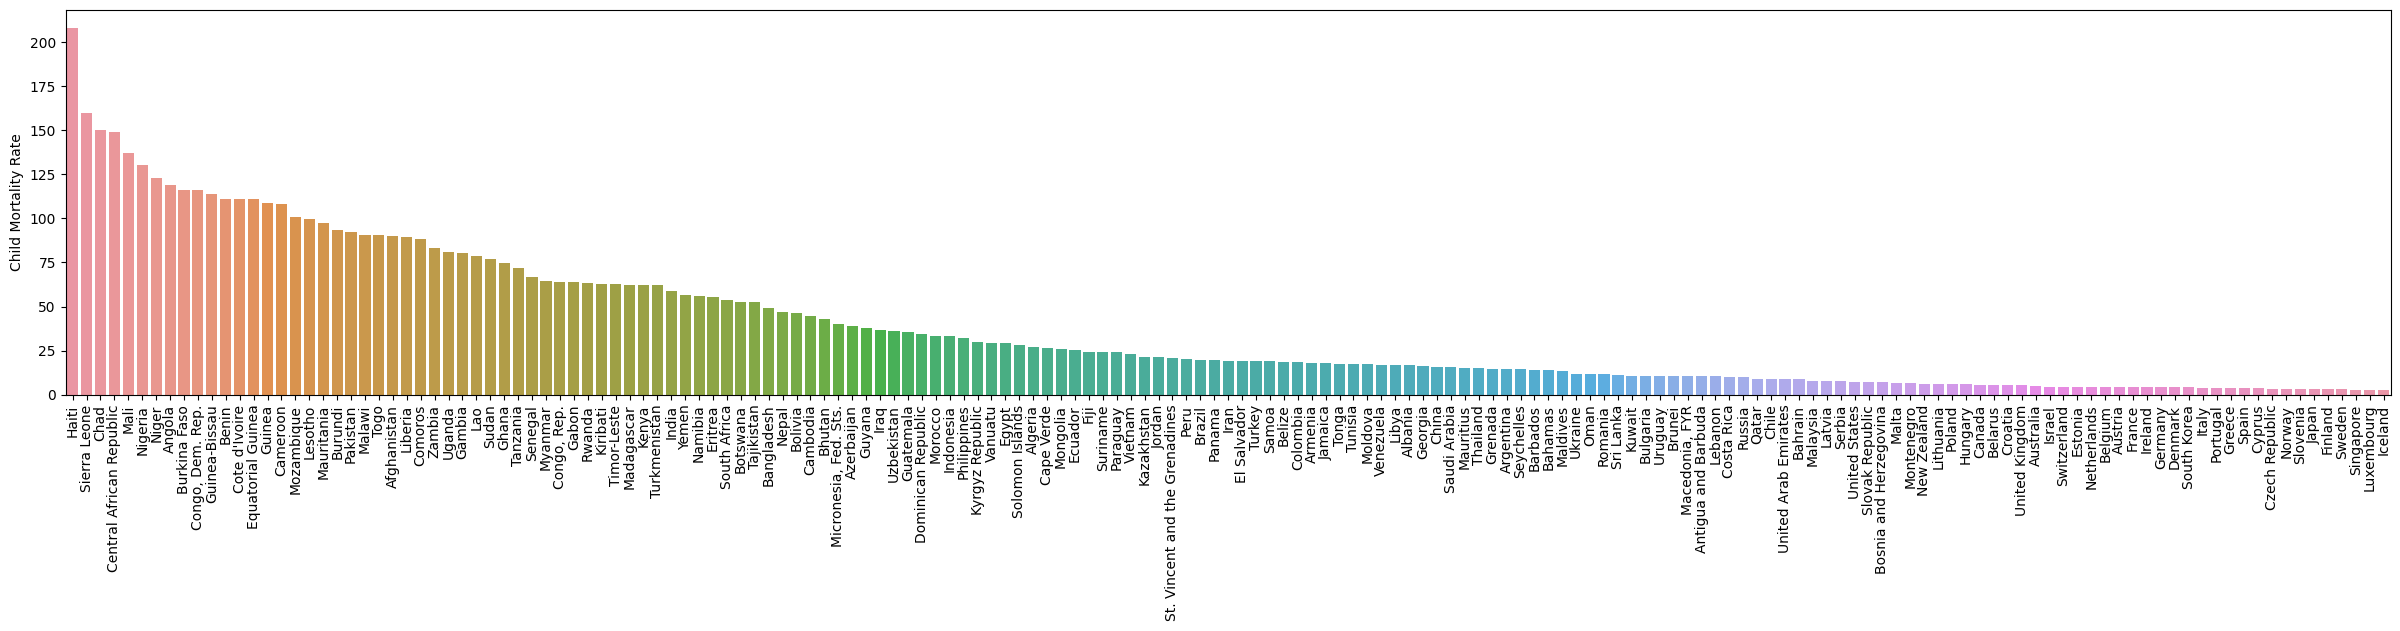

In [21]:
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
plt.figure(figsize = (30,5))
child_mort = ngo[['country','child_mort']].sort_values('child_mort', ascending = False)
ax = sns.barplot(x='country', y='child_mort', data= child_mort)
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

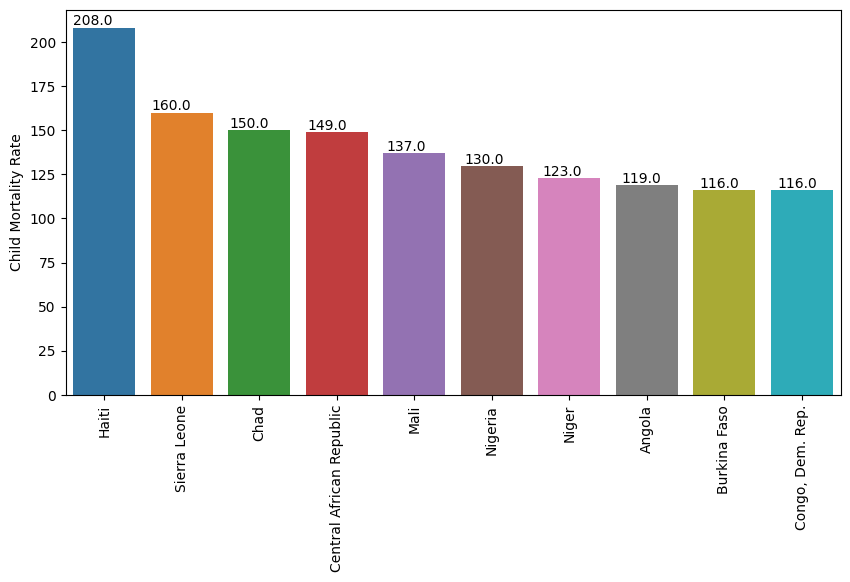

In [22]:
plt.figure(figsize = (10,5))
child_mort_top10 = ngo[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax = sns.barplot(x='country', y='child_mort', data= child_mort_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

Most of the countries are of Africa due to poor healthcare facilities

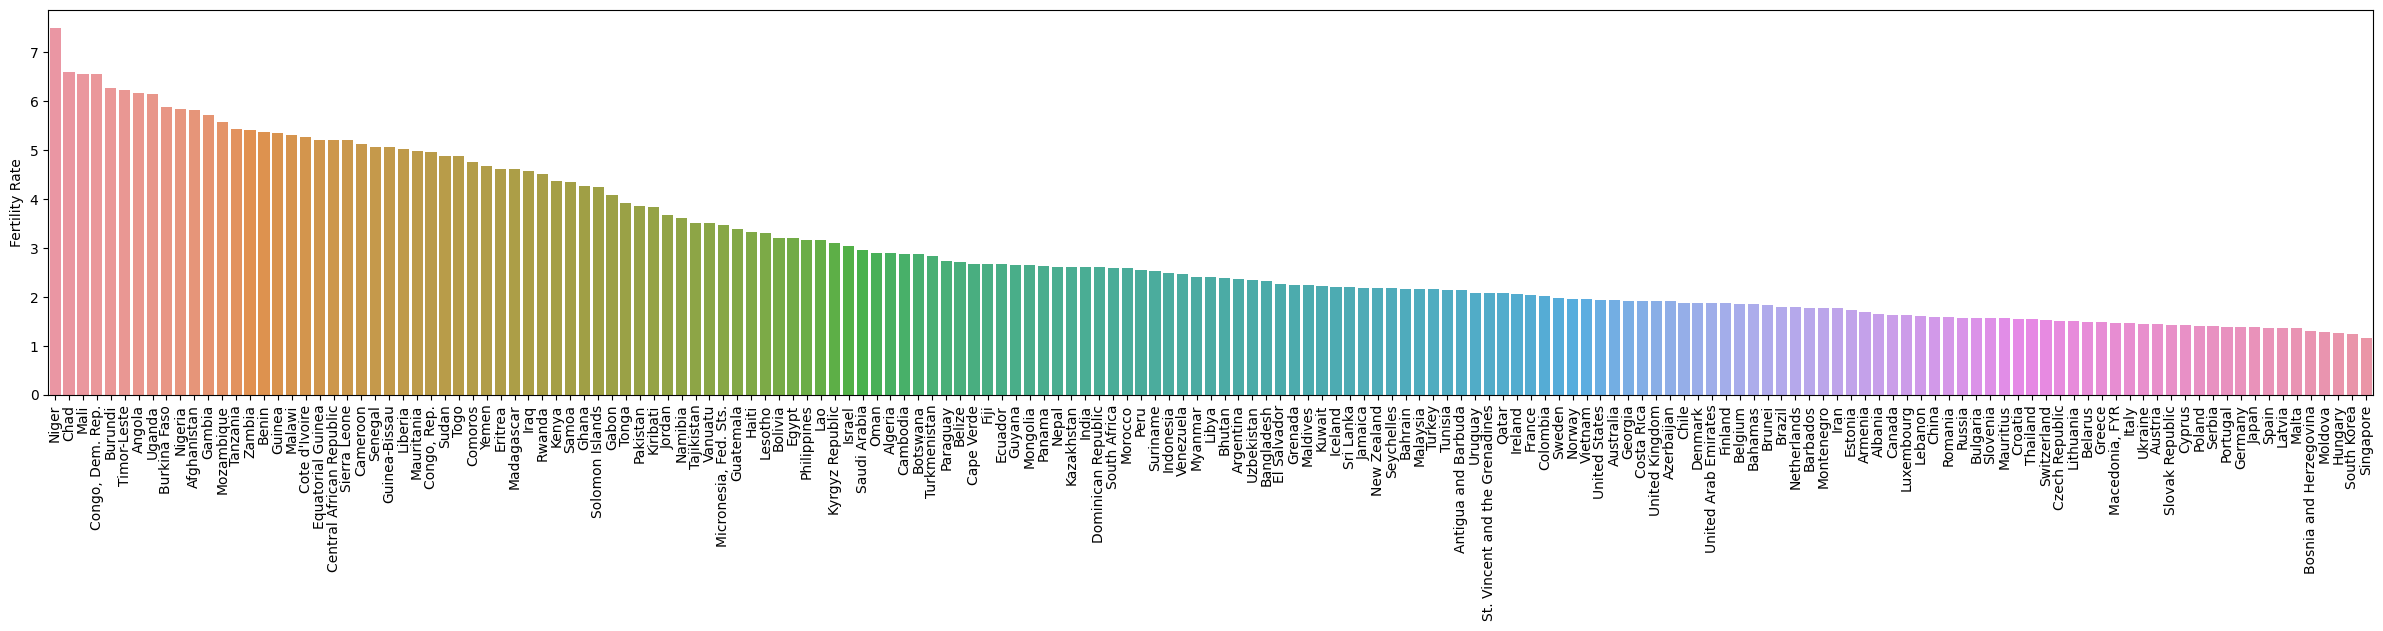

In [23]:
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
plt.figure(figsize = (30,5))
total_fer = ngo[['country','total_fer']].sort_values('total_fer', ascending = False)
ax = sns.barplot(x='country', y='total_fer', data= total_fer)
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

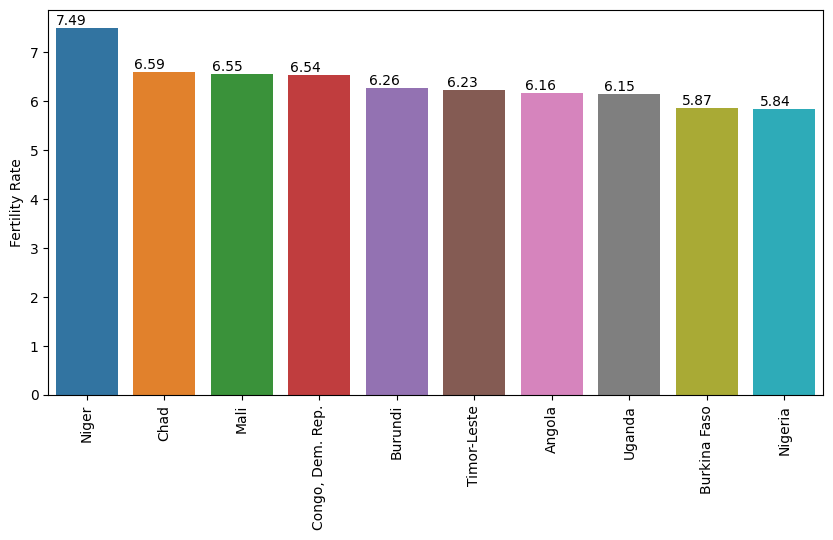

In [24]:
plt.figure(figsize = (10,5))
total_fer_top10 = ngo[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
ax = sns.barplot(x='country', y='total_fer', data= total_fer_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

fertility rates are higher due to the lack of access to contraceptives and generally lower levels of female education.

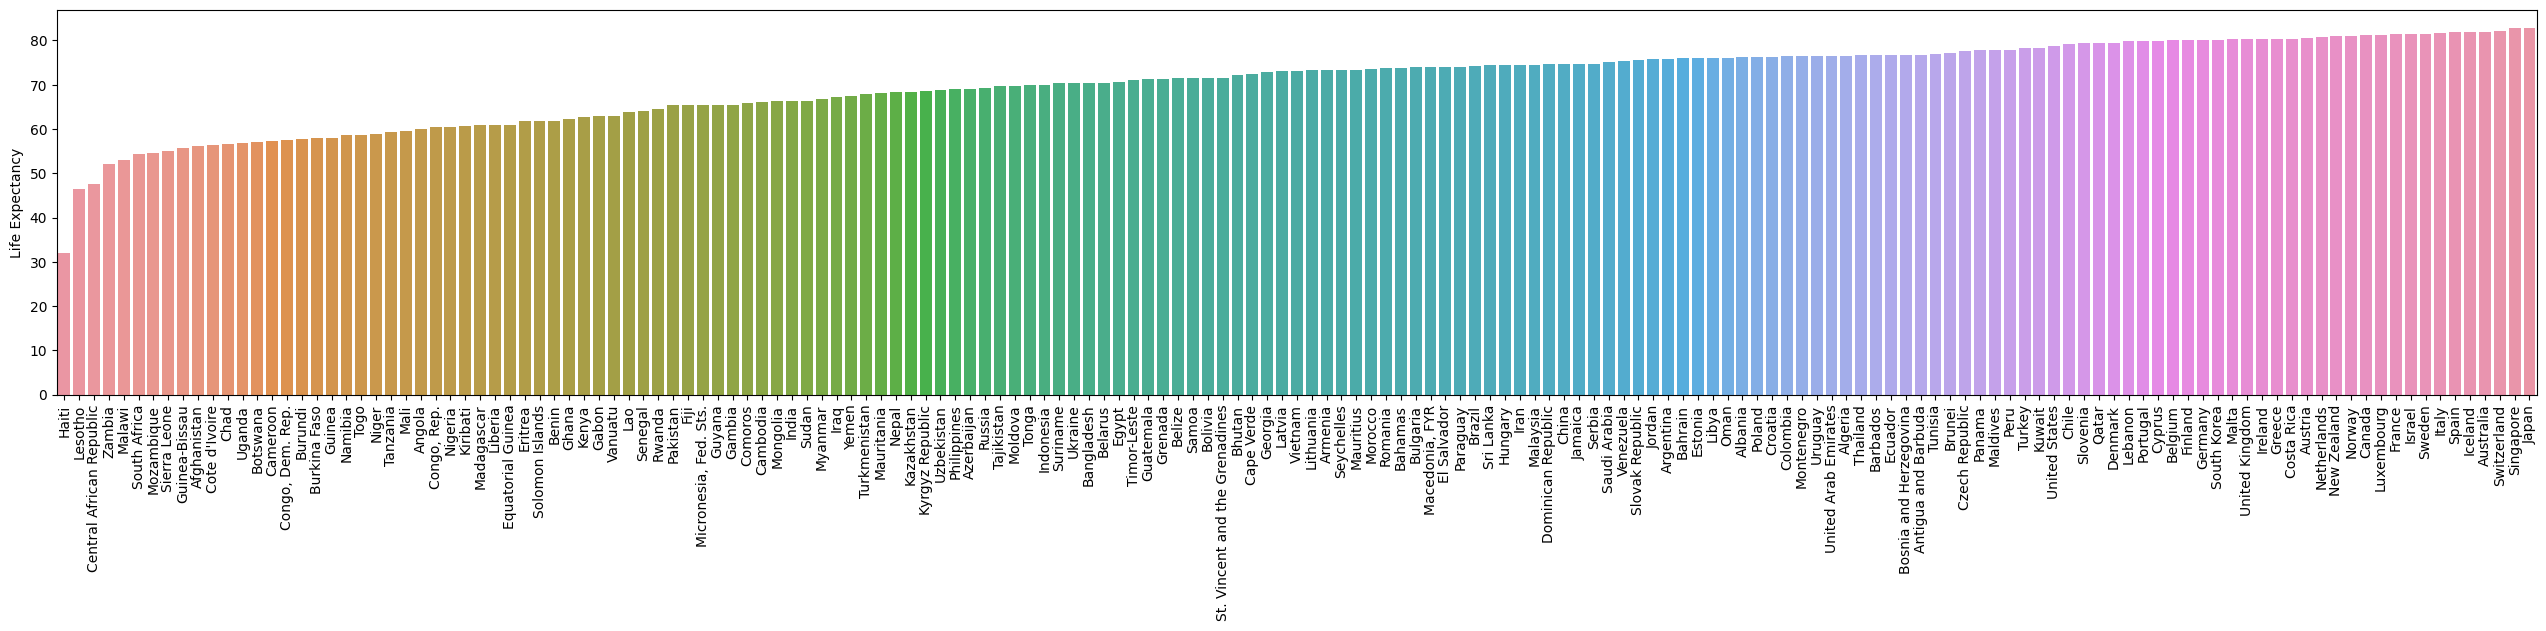

In [25]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
plt.figure(figsize = (32,5))
life_expec = ngo[['country','life_expec']].sort_values('life_expec', ascending = True)
ax = sns.barplot(x='country', y='life_expec', data= life_expec)
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

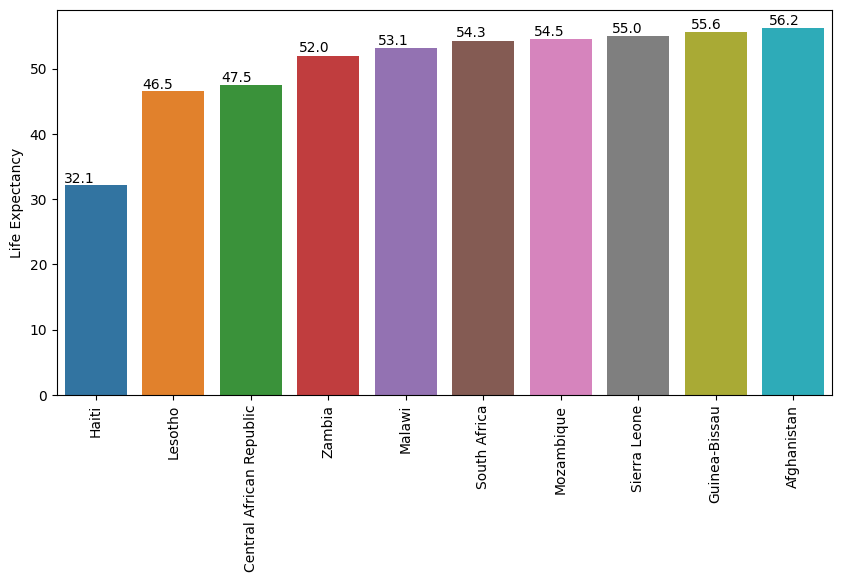

In [26]:
plt.figure(figsize = (10,5))
life_expec_bottom10 = ngo[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
ax = sns.barplot(x='country', y='life_expec', data= life_expec_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

Life expectancy is lower due to poverty , poor healthcare and poor hygiene

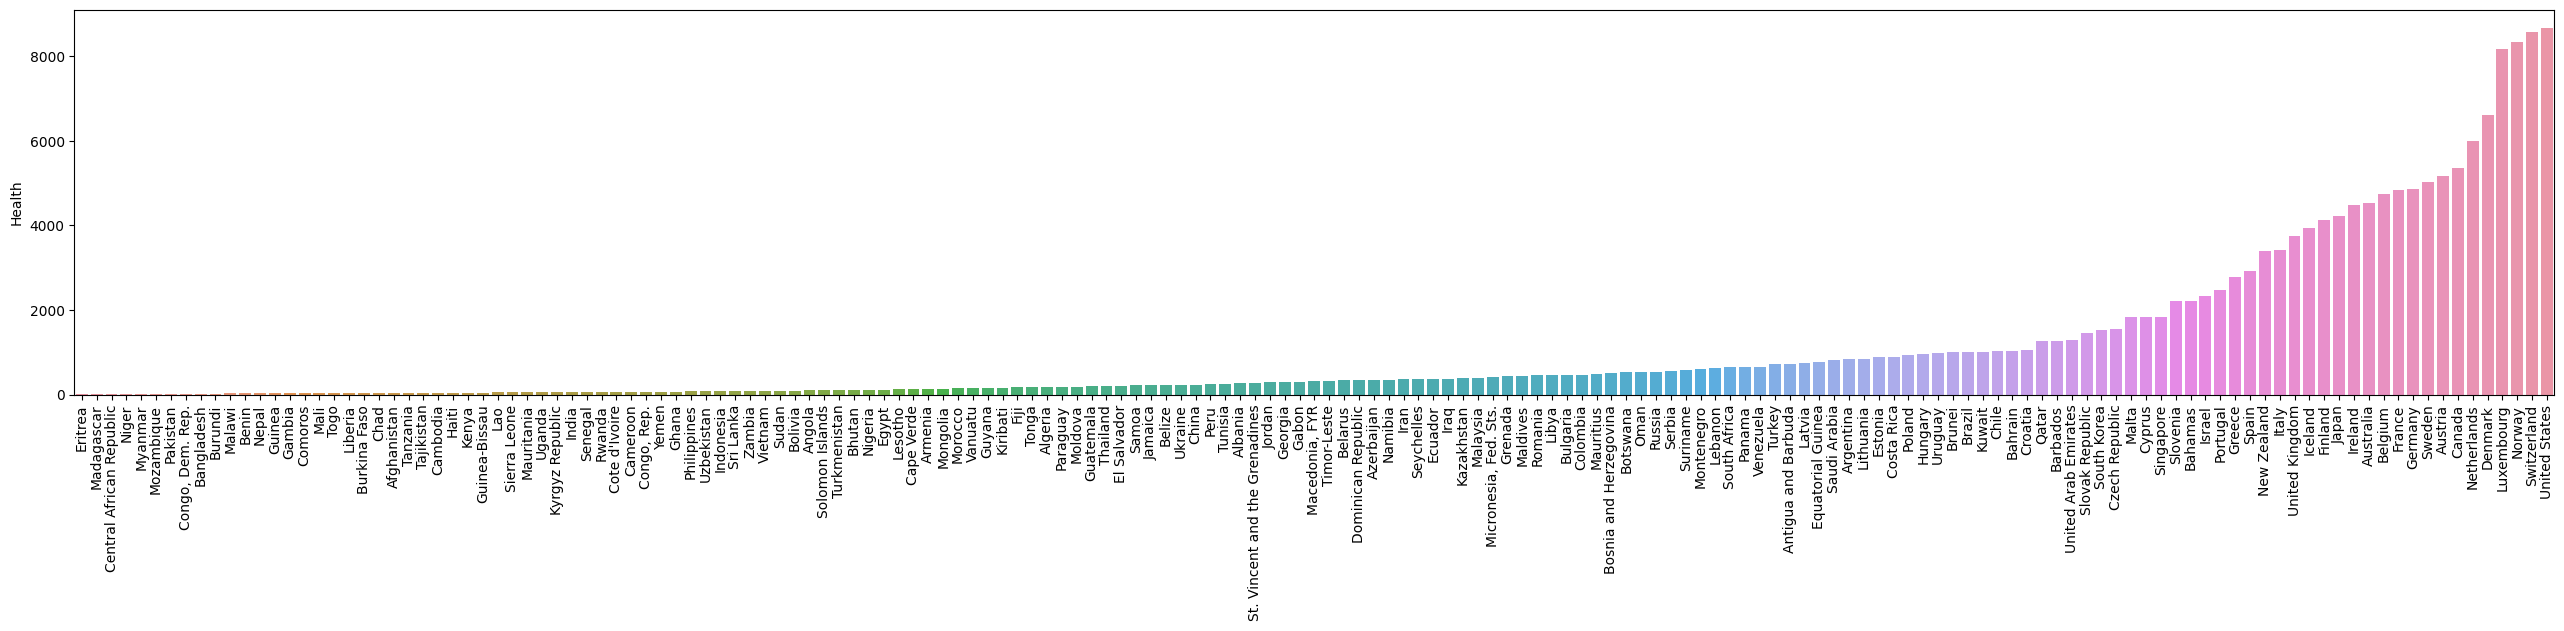

In [27]:
# Health :Total health spending .
plt.figure(figsize = (32,5))
health = ngo[['country','health']].sort_values('health', ascending = True)
ax = sns.barplot(x='country', y='health', data= health)
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

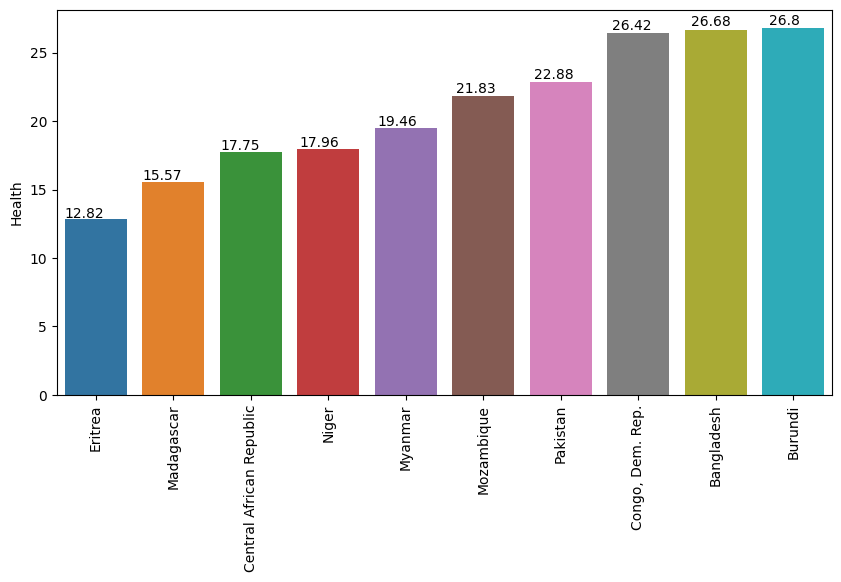

In [28]:
plt.figure(figsize = (10,5))
health_bottom10 = ngo[['country','health']].sort_values('health', ascending = True).head(10)
ax = sns.barplot(x='country', y='health', data= health_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

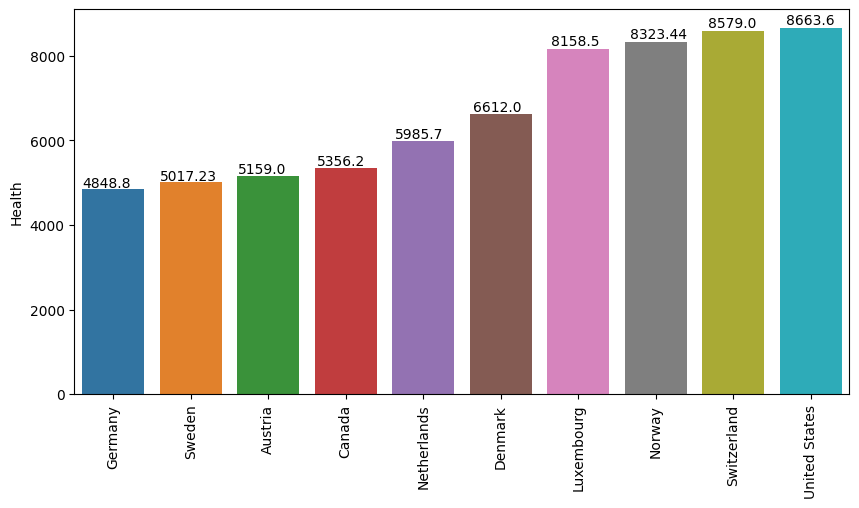

In [29]:
plt.figure(figsize = (10,5))
health_top10 = ngo[['country','health']].sort_values('health', ascending = True).tail(10)
ax = sns.barplot(x='country', y='health', data= health_top10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

Developed countries spend a large amount of their gdp in health sector

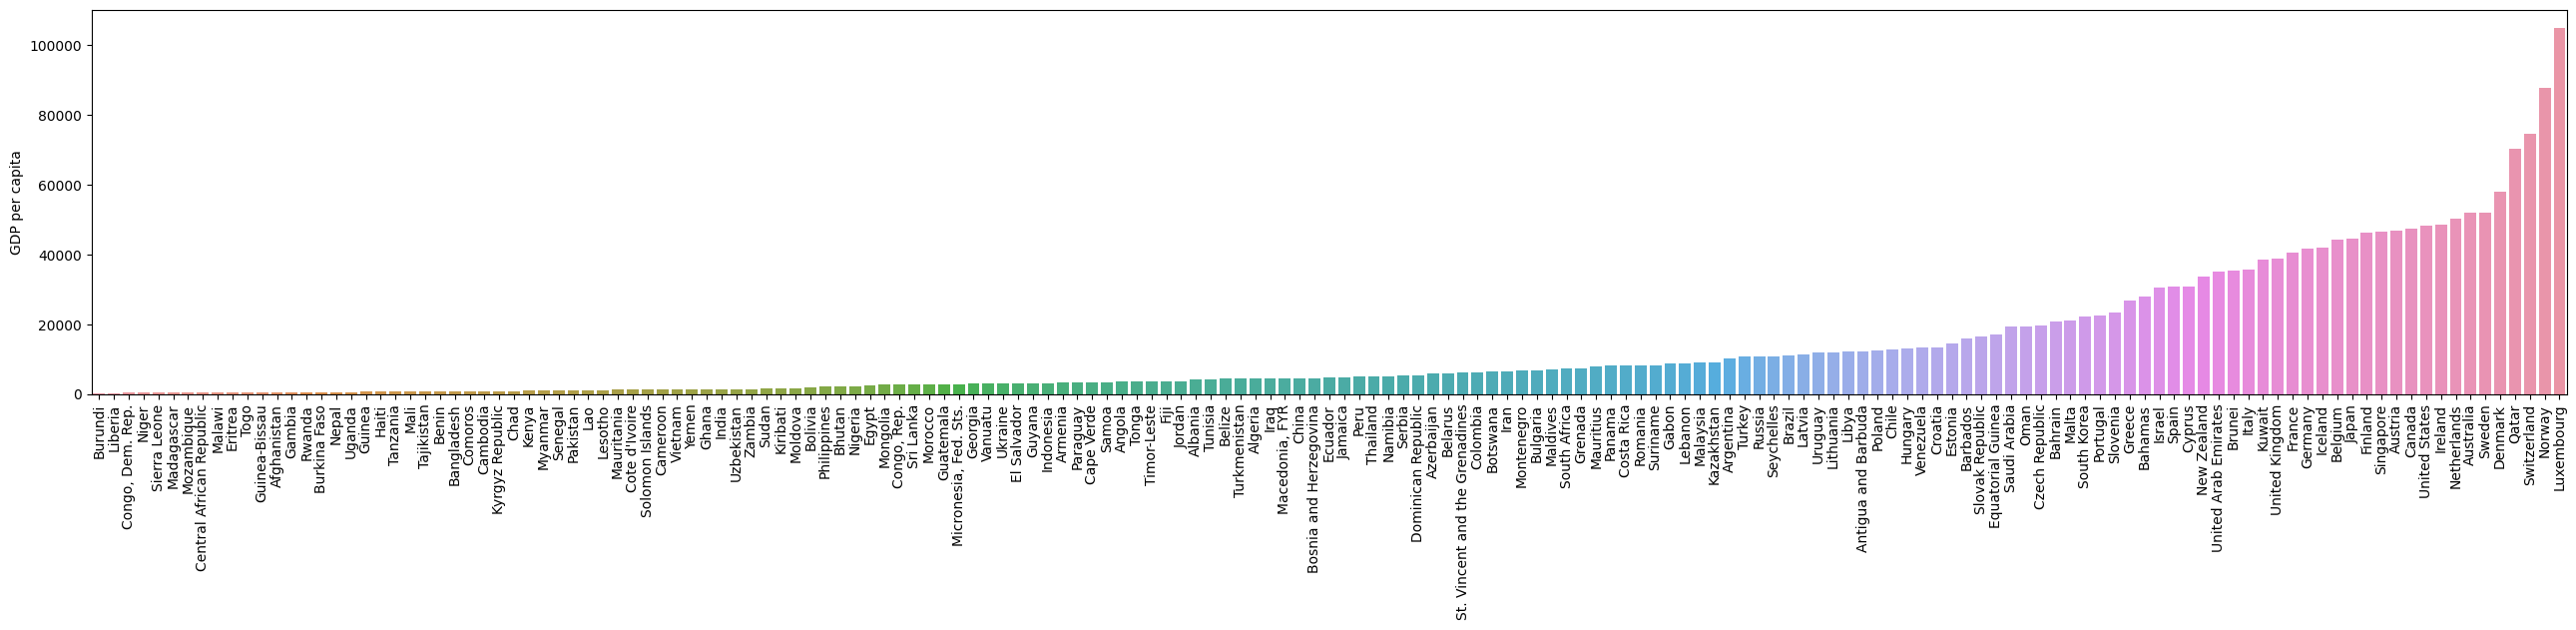

In [30]:
# The GDP per capita : Calculated as the Total GDP divided by the total population.
plt.figure(figsize = (32,5))
gdpp = ngo[['country','gdpp']].sort_values('gdpp', ascending = True)
ax = sns.barplot(x='country', y='gdpp', data= gdpp)
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

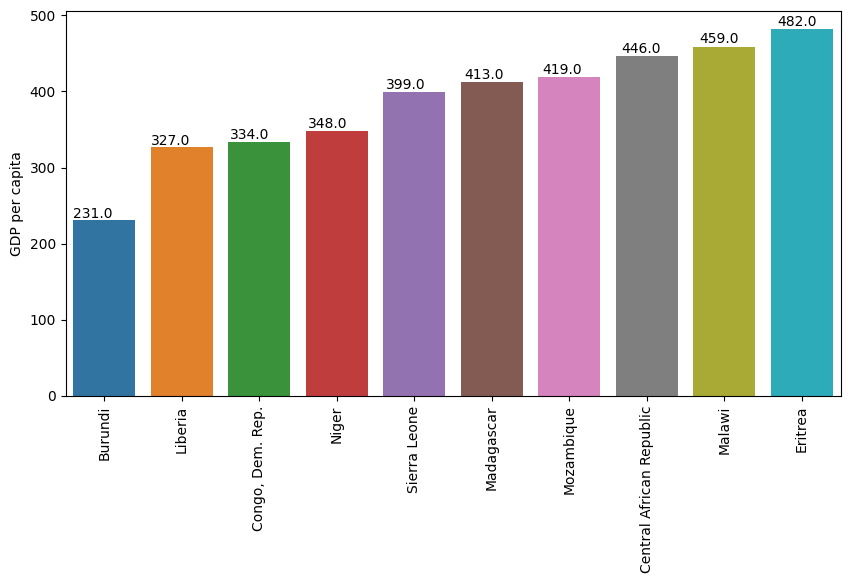

In [31]:
plt.figure(figsize = (10,5))
gdpp_bottom10 = ngo[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
ax = sns.barplot(x='country', y='gdpp', data= gdpp_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

Lower gdp per capita countries belong to East Africa

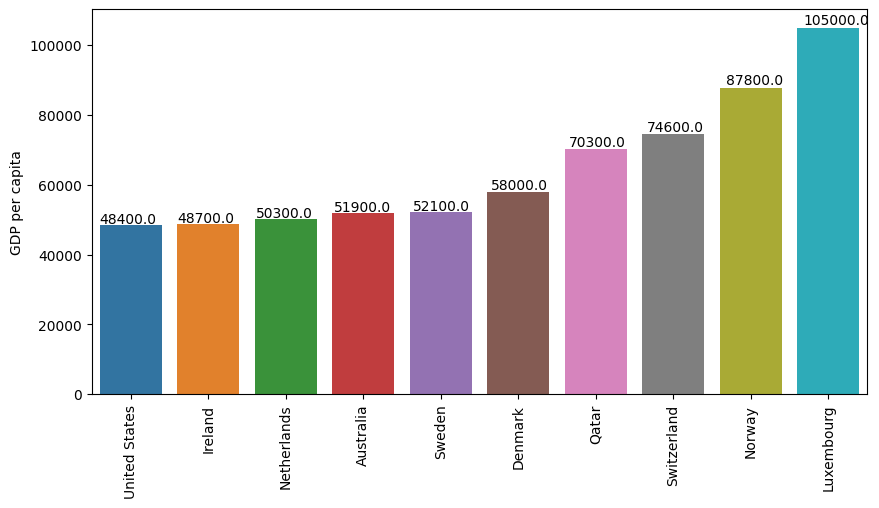

In [32]:
plt.figure(figsize = (10,5))
gdpp_top10 = ngo[['country','gdpp']].sort_values('gdpp', ascending = True).tail(10)
ax = sns.barplot(x='country', y='gdpp', data= gdpp_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

Higher gdp per capita belongs to Europe

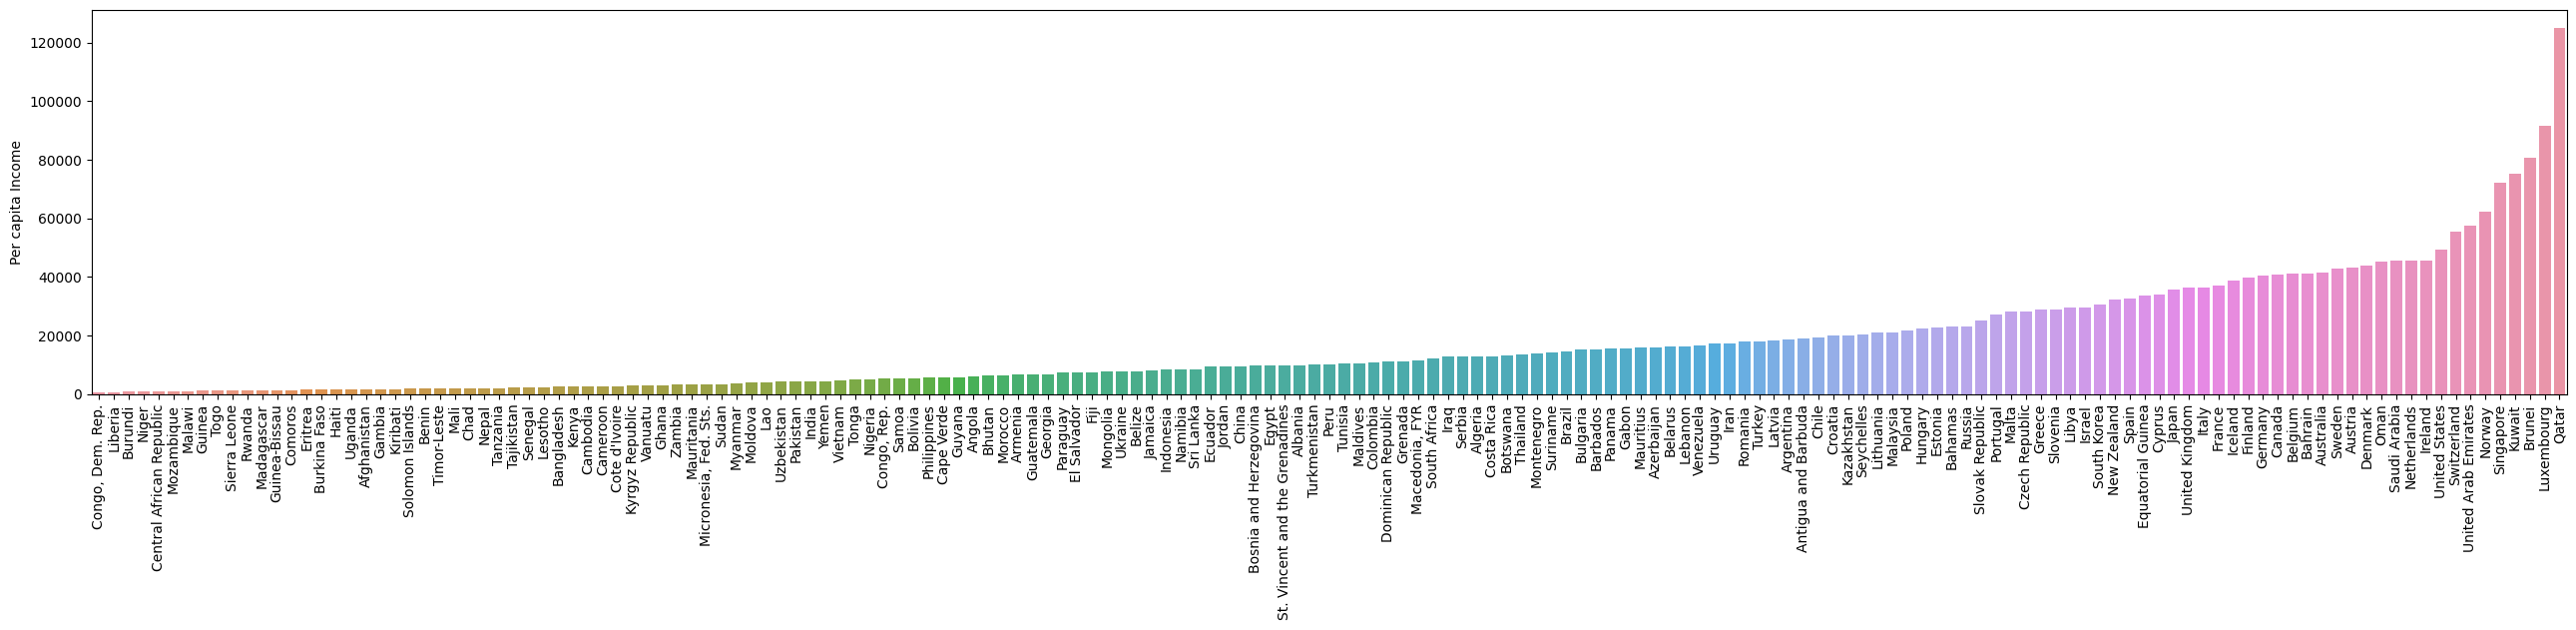

In [33]:
# Per capita Income : Net income per person
plt.figure(figsize = (32,5))
income = ngo[['country','income']].sort_values('income', ascending = True)
ax = sns.barplot(x='country', y='income', data=income)
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

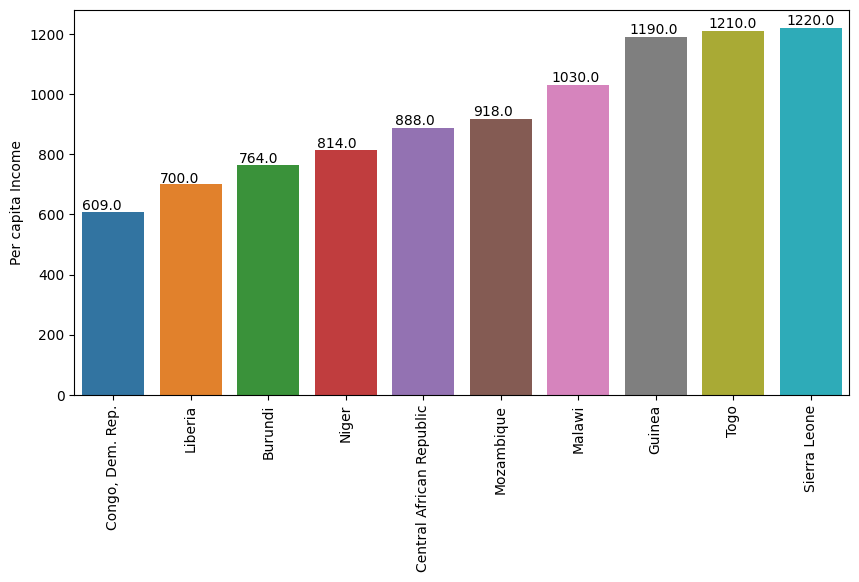

In [34]:
plt.figure(figsize = (10,5))
income_bottom10 = ngo[['country','income']].sort_values('income', ascending = True).head(10)
ax = sns.barplot(x='country', y='income', data= income_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

Once again Africa is at the bottom . Its countries are extremely poor


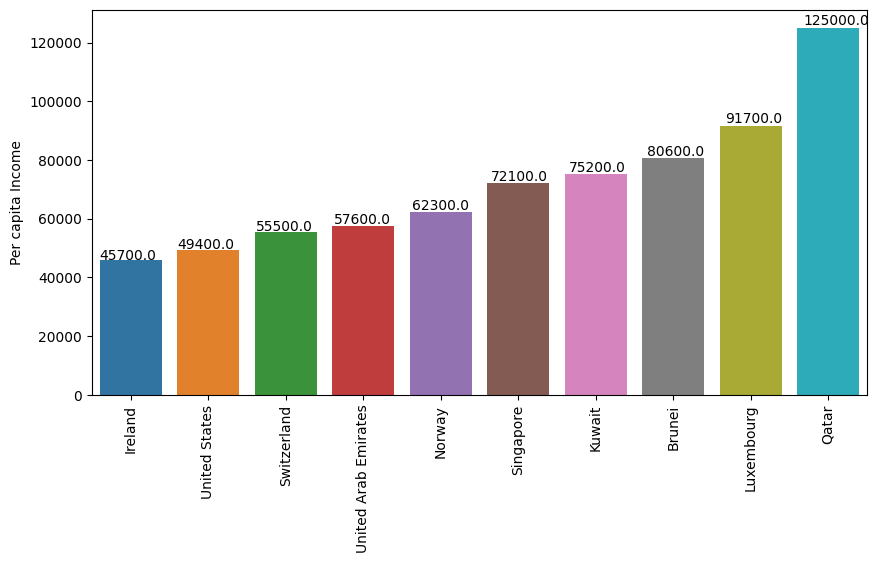

In [35]:
plt.figure(figsize = (10,5))
income_top10 = ngo[['country','income']].sort_values('income', ascending = True).tail(10)
ax = sns.barplot(x='country', y='income', data= income_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

Gulf Countries and Europe dominates

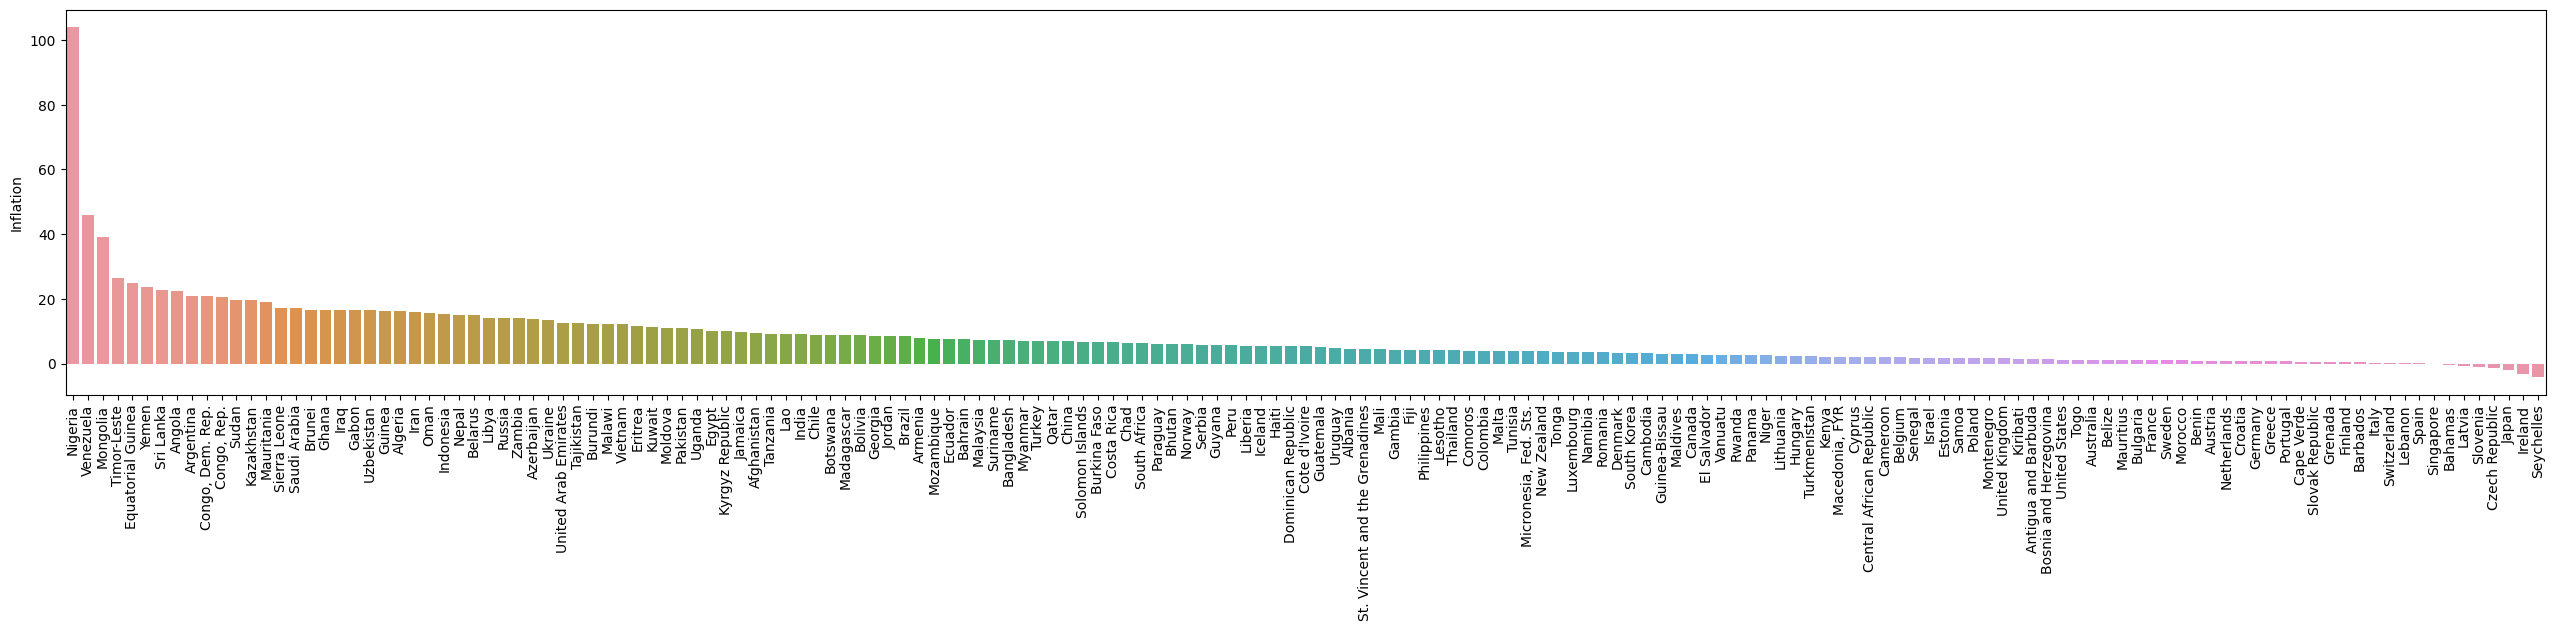

In [36]:
# Inflation: The measurement of the annual growth rate of the Total GDP
plt.figure(figsize = (32,5))
inflation = ngo[['country','inflation']].sort_values('inflation', ascending = False)
ax = sns.barplot(x='country', y='inflation', data= inflation)
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

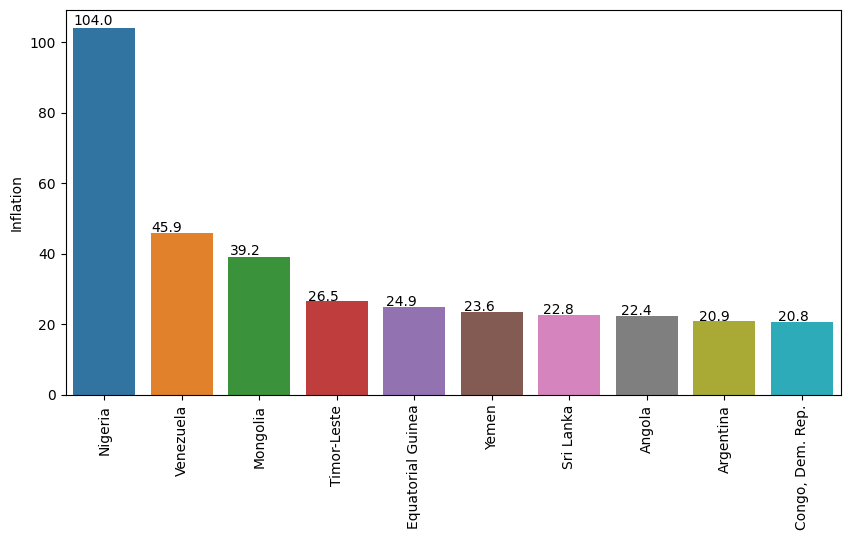

In [37]:
plt.figure(figsize = (10,5))
inflation_top10 = ngo[['country','inflation']].sort_values('inflation', ascending = False).head(10)
ax = sns.barplot(x='country', y='inflation', data= inflation_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

These countries are politically unstable such as SriLanka , Yemen

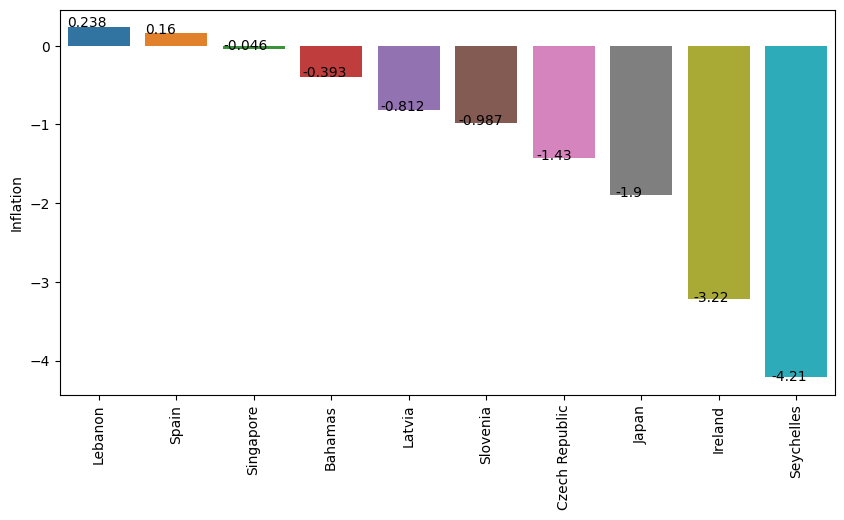

In [38]:
plt.figure(figsize = (10,5))
inflation_bottom10 = ngo[['country','inflation']].sort_values('inflation', ascending = False).tail(10)
ax = sns.barplot(x='country', y='inflation', data= inflation_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

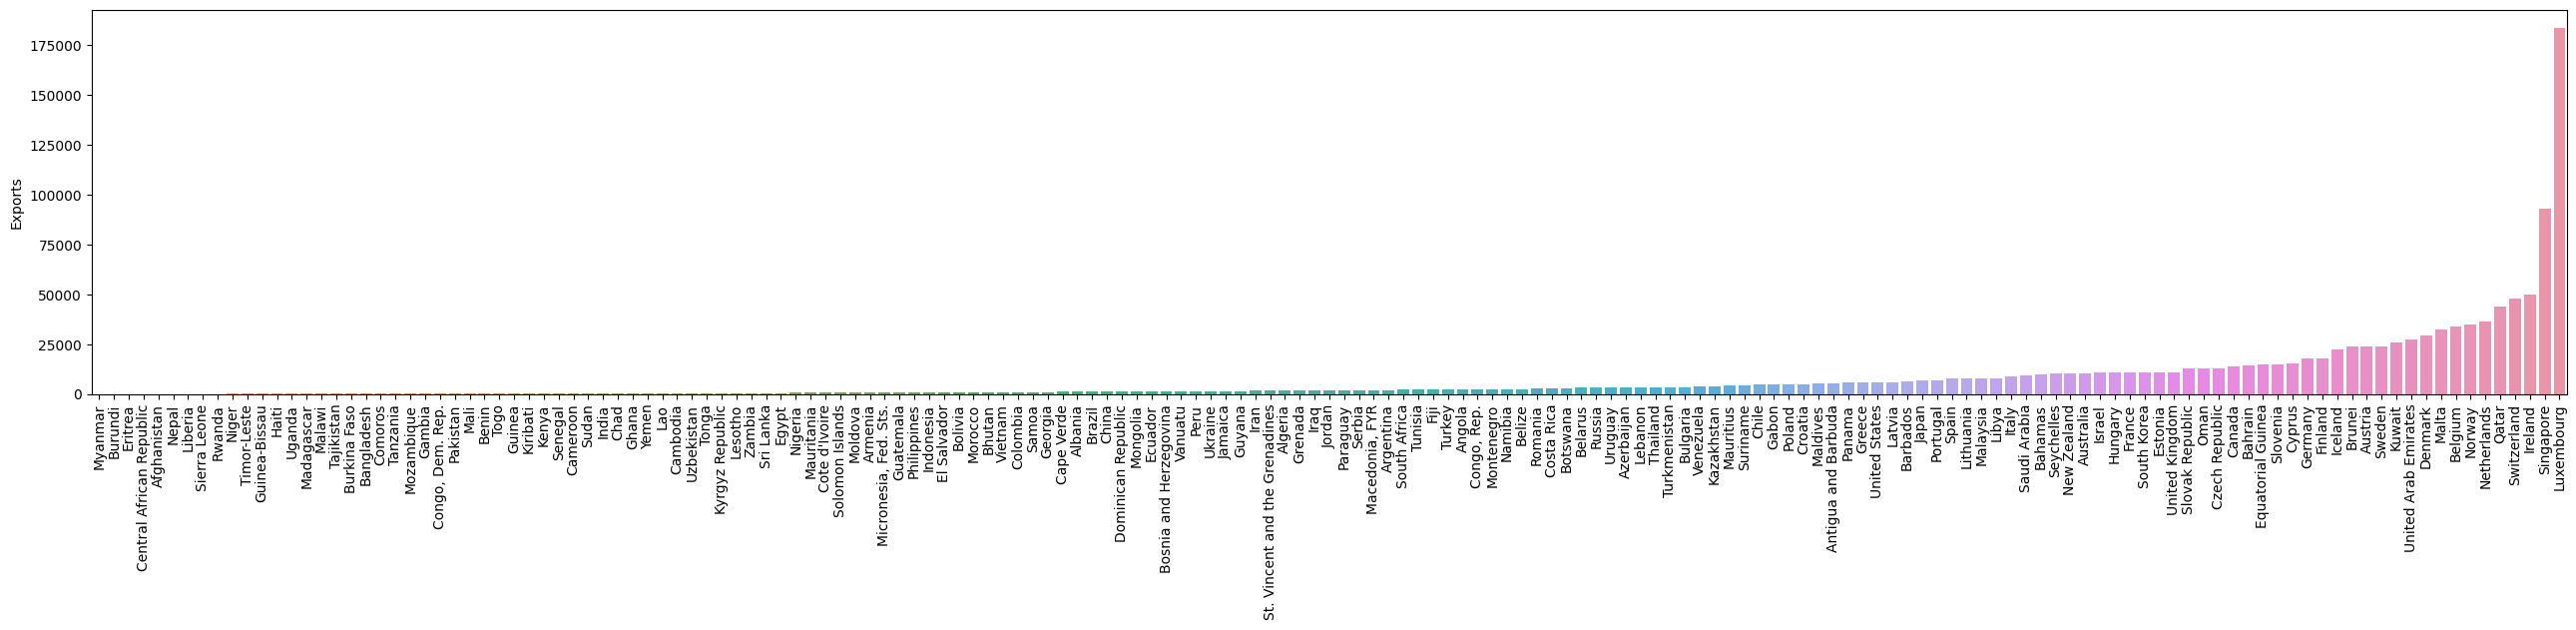

In [39]:
# Exports: Exports of goods and services.
plt.figure(figsize = (32,5))
exports = ngo[['country','exports']].sort_values('exports', ascending = True)
ax = sns.barplot(x='country', y='exports', data= exports)
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

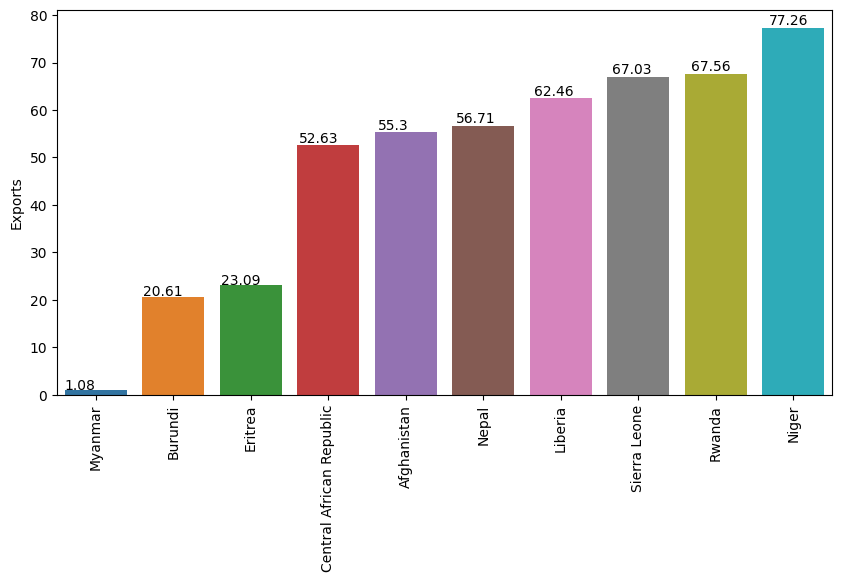

In [40]:
plt.figure(figsize = (10,5))
exports_bottom10 = ngo[['country','exports']].sort_values('exports', ascending = True).head(10)
ax = sns.barplot(x='country', y='exports', data= exports_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

Developing / undeveloped countries have low exports

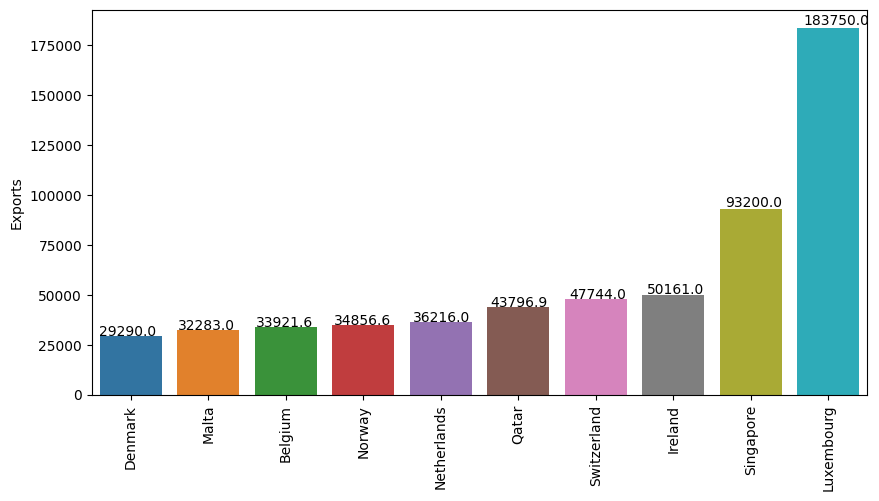

In [41]:
plt.figure(figsize = (10,5))
exports_top10 = ngo[['country','exports']].sort_values('exports', ascending = True).tail(10)
ax = sns.barplot(x='country', y='exports', data= exports_top10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

Developed countries have high exports

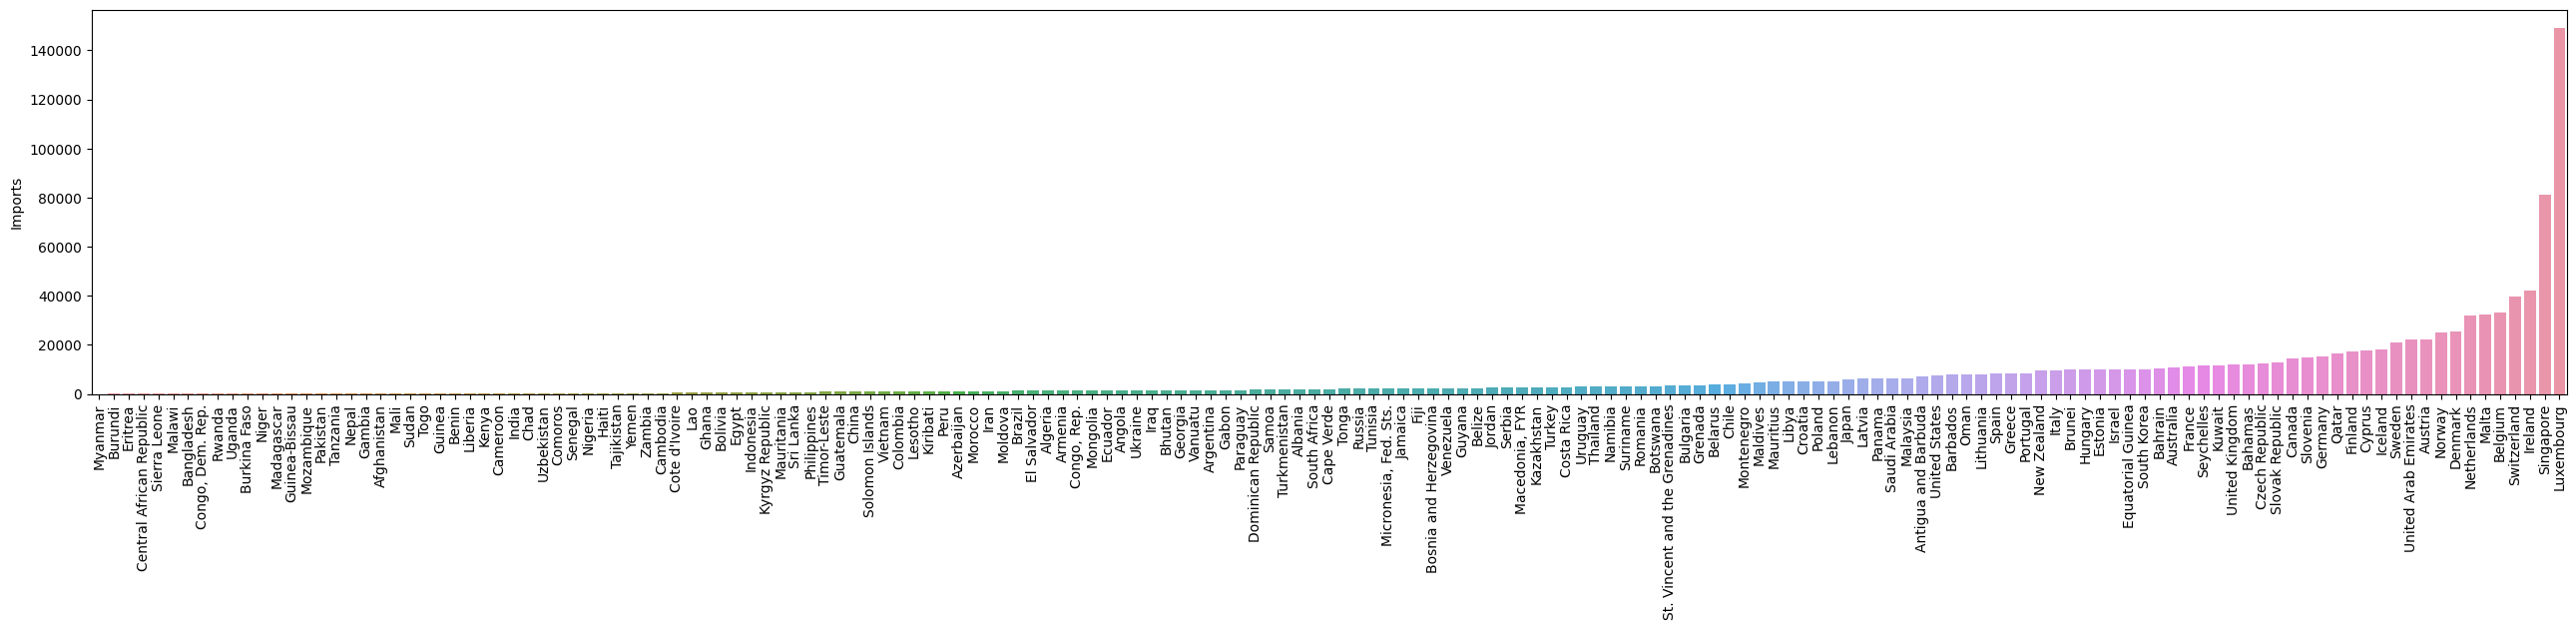

In [42]:
# Imports: Imports of goods and services.
plt.figure(figsize = (32,5))
imports = ngo[['country','imports']].sort_values('imports', ascending = True)
ax = sns.barplot(x='country', y='imports', data= imports)
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

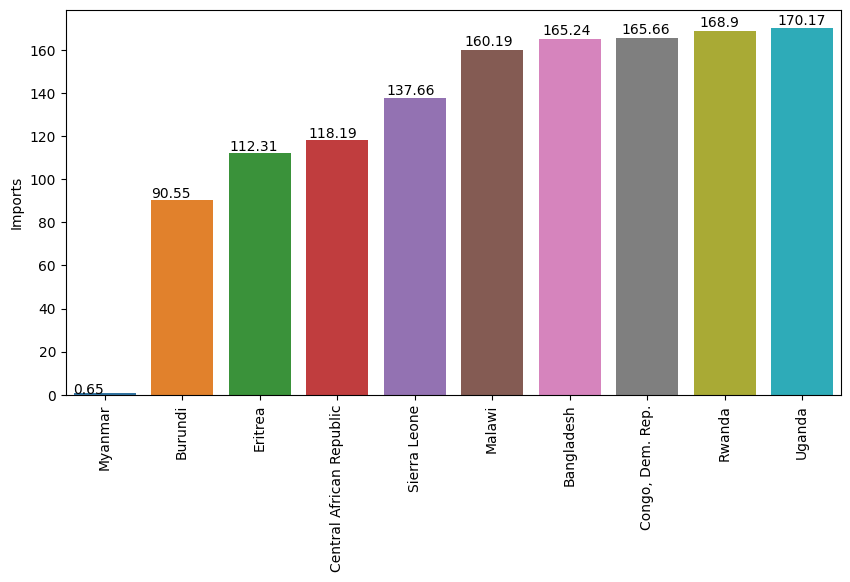

In [43]:
plt.figure(figsize = (10,5))
imports_bottom10 = ngo[['country','imports']].sort_values('imports', ascending = True).head(10)
ax = sns.barplot(x='country', y='imports', data= imports_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

Developed countries imports also in a large amount such as Singapore , Luxembourg

**Lets Look at the lowest 5 countries for each factor**

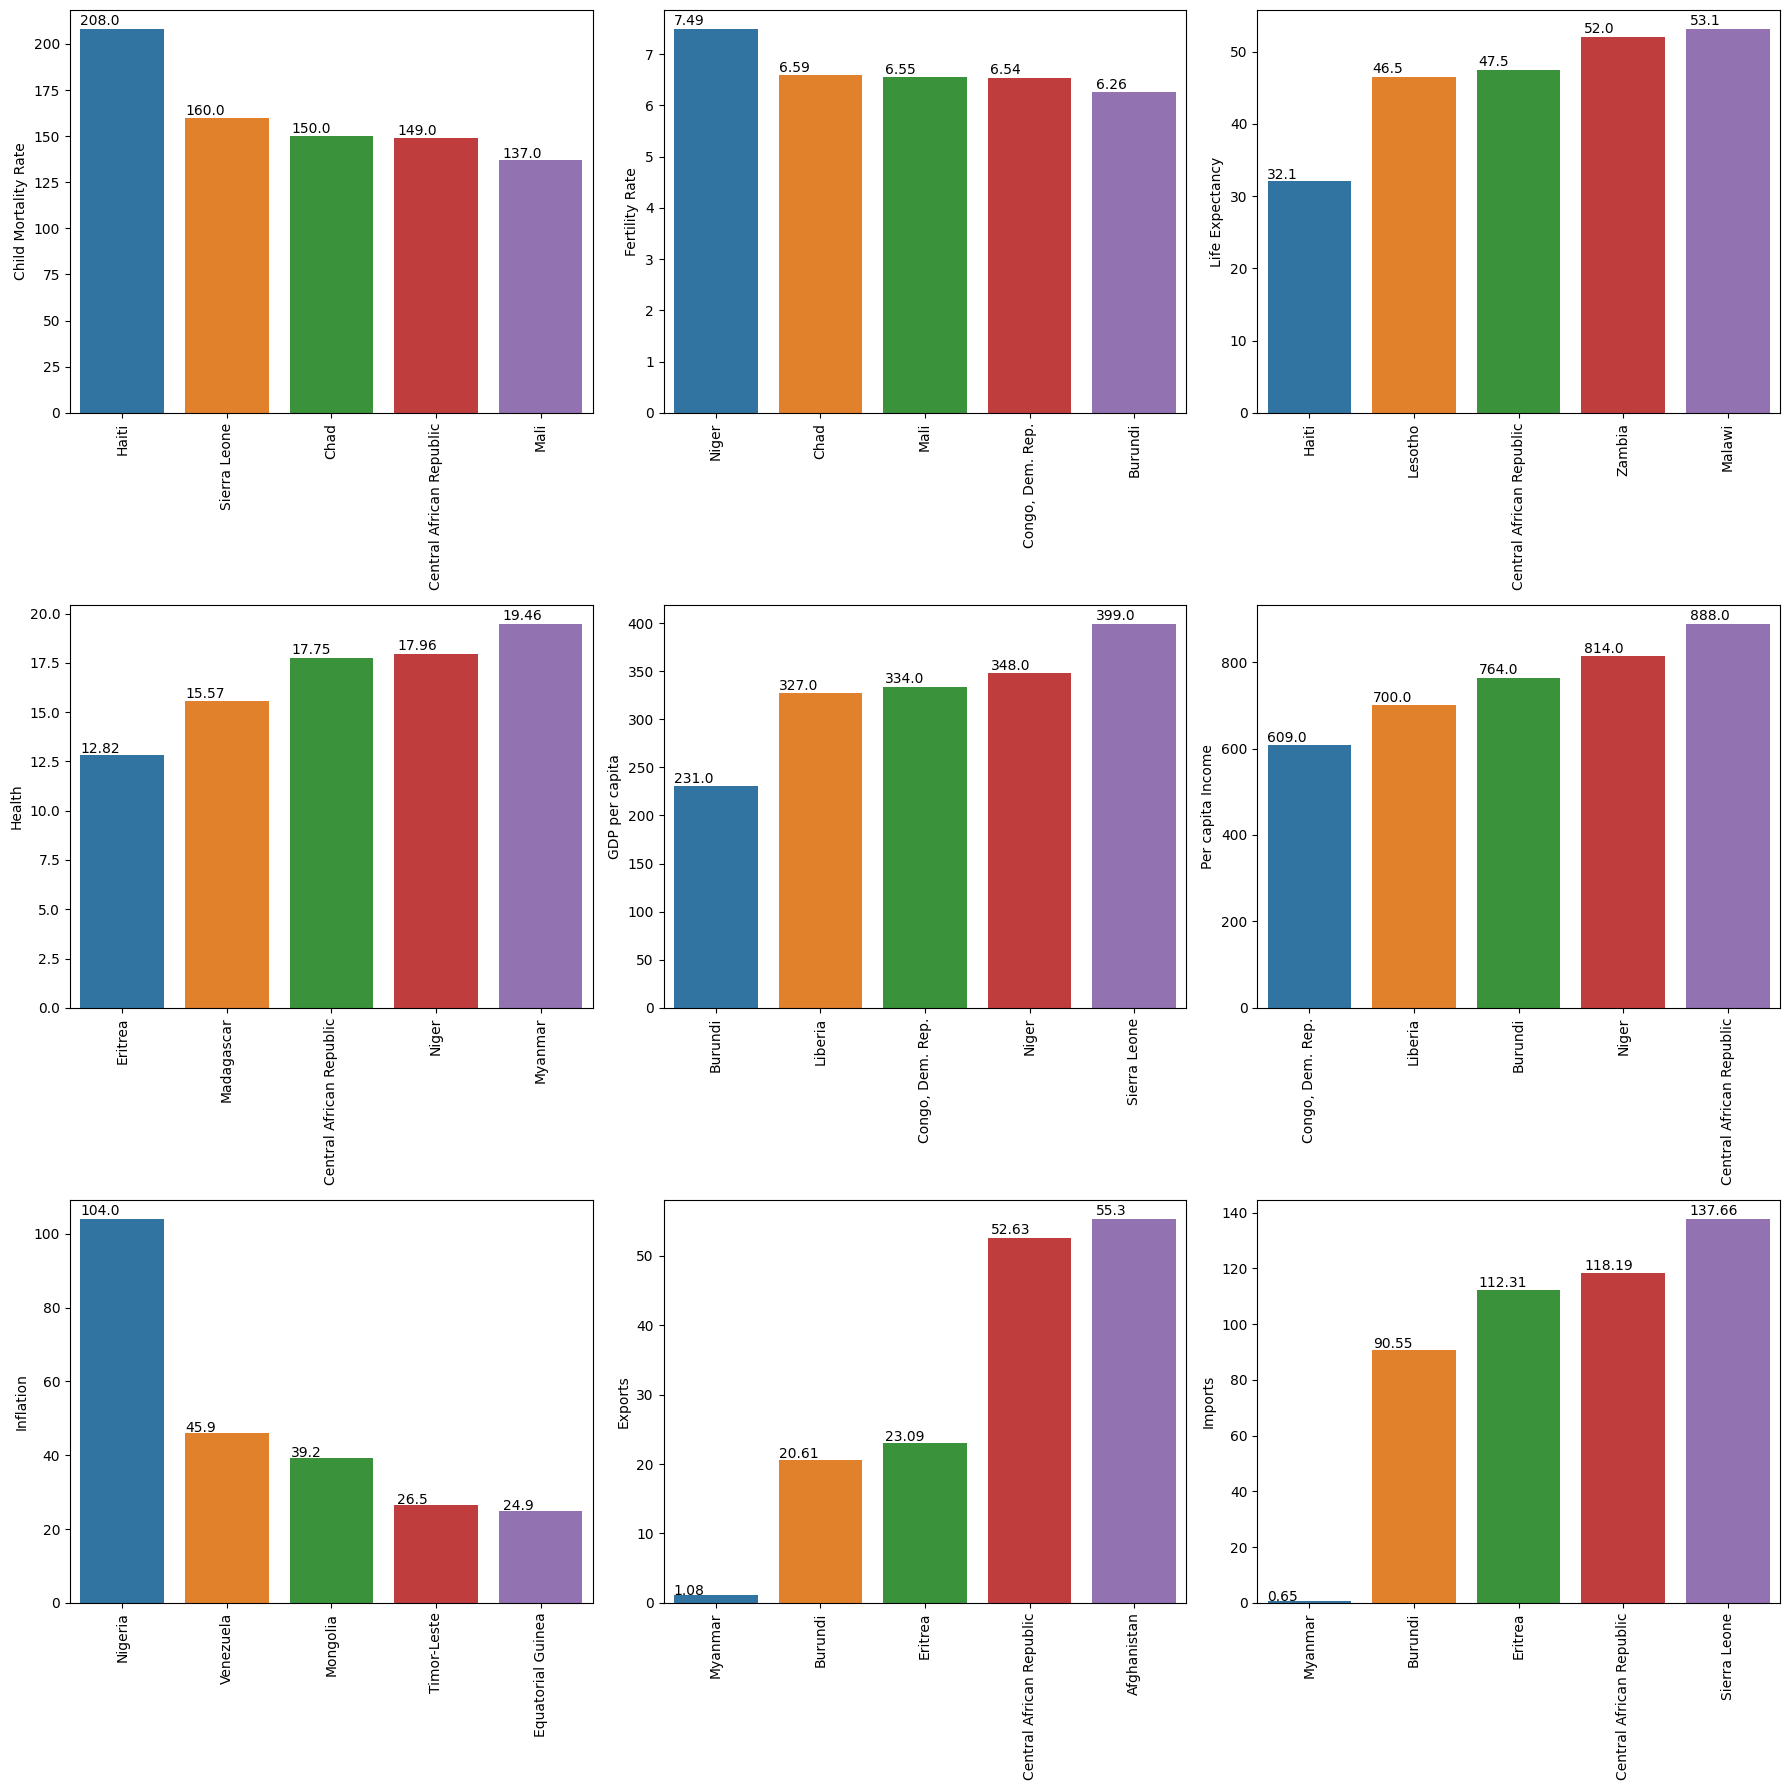

In [44]:
fig, axs = plt.subplots(3,3,figsize = (18,18))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top5_child_mort = ngo[['country','child_mort']].sort_values('child_mort', ascending = False).head()
ax = sns.barplot(x='country', y='child_mort', data= top5_child_mort, ax = axs[0,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top5_total_fer = ngo[['country','total_fer']].sort_values('total_fer', ascending = False).head()
ax = sns.barplot(x='country', y='total_fer', data= top5_total_fer, ax = axs[0,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom5_life_expec = ngo[['country','life_expec']].sort_values('life_expec', ascending = True).head()
ax = sns.barplot(x='country', y='life_expec', data= bottom5_life_expec, ax = axs[0,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom5_health = ngo[['country','health']].sort_values('health', ascending = True).head()
ax = sns.barplot(x='country', y='health', data= bottom5_health, ax = axs[1,0])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom5_gdpp = ngo[['country','gdpp']].sort_values('gdpp', ascending = True).head()
ax = sns.barplot(x='country', y='gdpp', data= bottom5_gdpp, ax = axs[1,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom5_income = ngo[['country','income']].sort_values('income', ascending = True).head()
ax = sns.barplot(x='country', y='income', data= bottom5_income, ax = axs[1,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top5_inflation = ngo[['country','inflation']].sort_values('inflation', ascending = False).head()
ax = sns.barplot(x='country', y='inflation', data= top5_inflation, ax = axs[2,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom5_exports = ngo[['country','exports']].sort_values('exports', ascending = True).head()
ax = sns.barplot(x='country', y='exports', data= bottom5_exports, ax = axs[2,1])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom5_imports = ngo[['country','imports']].sort_values('imports', ascending = True).head()
ax = sns.barplot(x='country', y='imports', data= bottom5_imports, ax = axs[2,2])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig('EDA')
plt.show()

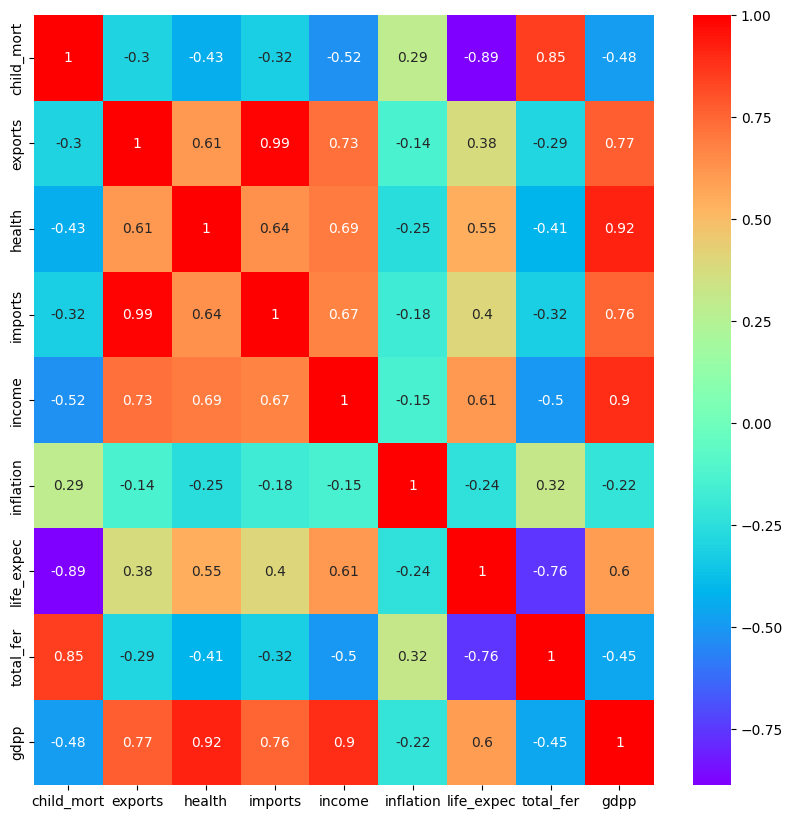

In [45]:
plt.figure(figsize = (10, 10))
sns.heatmap(ngo.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

1. Child mortality rate is positively correlated to fertility rate (Higher fertily rate , higher child mort rate)
2. Child mort rate is negatively correlated to life expect (Higher life expect  , lower child mort rate)
3. Exports are linearly positive correlated to imports(Higher export countries imports higher and vice versa)
4. life expect is negative correlated to fertility rate

In [ ]:
sns.pairplot(ngo,corner=True,diag_kind="kde")
plt.show()

**OUTLIER ANALYSIS**

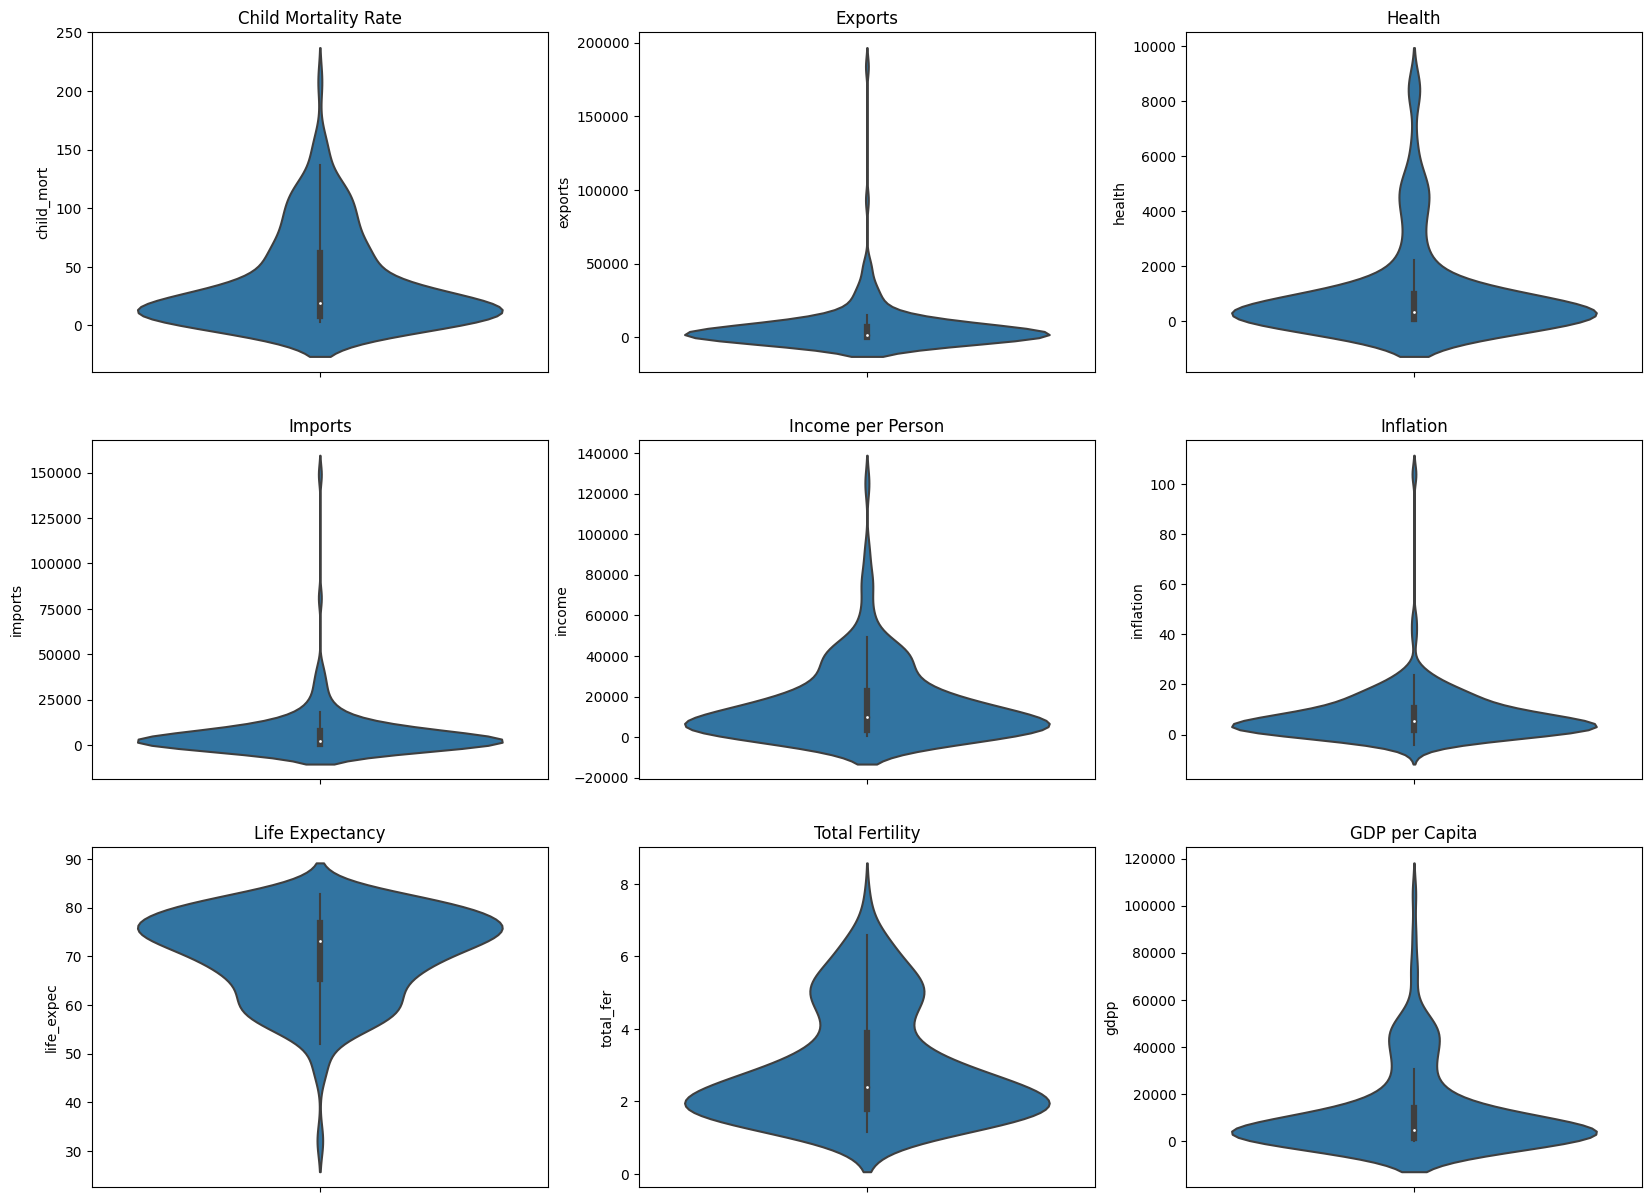

In [47]:
f, axes = plt.subplots(3, 3, figsize=(20, 15))
s=sns.violinplot(y=ngo.child_mort,ax=axes[0, 0])
axes[0, 0].set_title('Child Mortality Rate')
s=sns.violinplot(y=ngo.exports,ax=axes[0, 1])
axes[0, 1].set_title('Exports')
s=sns.violinplot(y=ngo.health,ax=axes[0, 2])
axes[0, 2].set_title('Health')

s=sns.violinplot(y=ngo.imports,ax=axes[1, 0])
axes[1, 0].set_title('Imports')
s=sns.violinplot(y=ngo.income,ax=axes[1, 1])
axes[1, 1].set_title('Income per Person')
s=sns.violinplot(y=ngo.inflation,ax=axes[1, 2])
axes[1, 2].set_title('Inflation')

s=sns.violinplot(y=ngo.life_expec,ax=axes[2, 0])
axes[2, 0].set_title('Life Expectancy')
s=sns.violinplot(y=ngo.total_fer,ax=axes[2, 1])
axes[2, 1].set_title('Total Fertility')
s=sns.violinplot(y=ngo.gdpp,ax=axes[2, 2])
axes[2, 2].set_title('GDP per Capita')
s.get_figure().savefig('boxplot subplots.png')
plt.show()

There are outliers in every feature  

1. gdpp and health has most outliers
2. We can't delete outlier rows as we have only 167 countries and it may remove some very undeveloped countries for which the given data is truth.

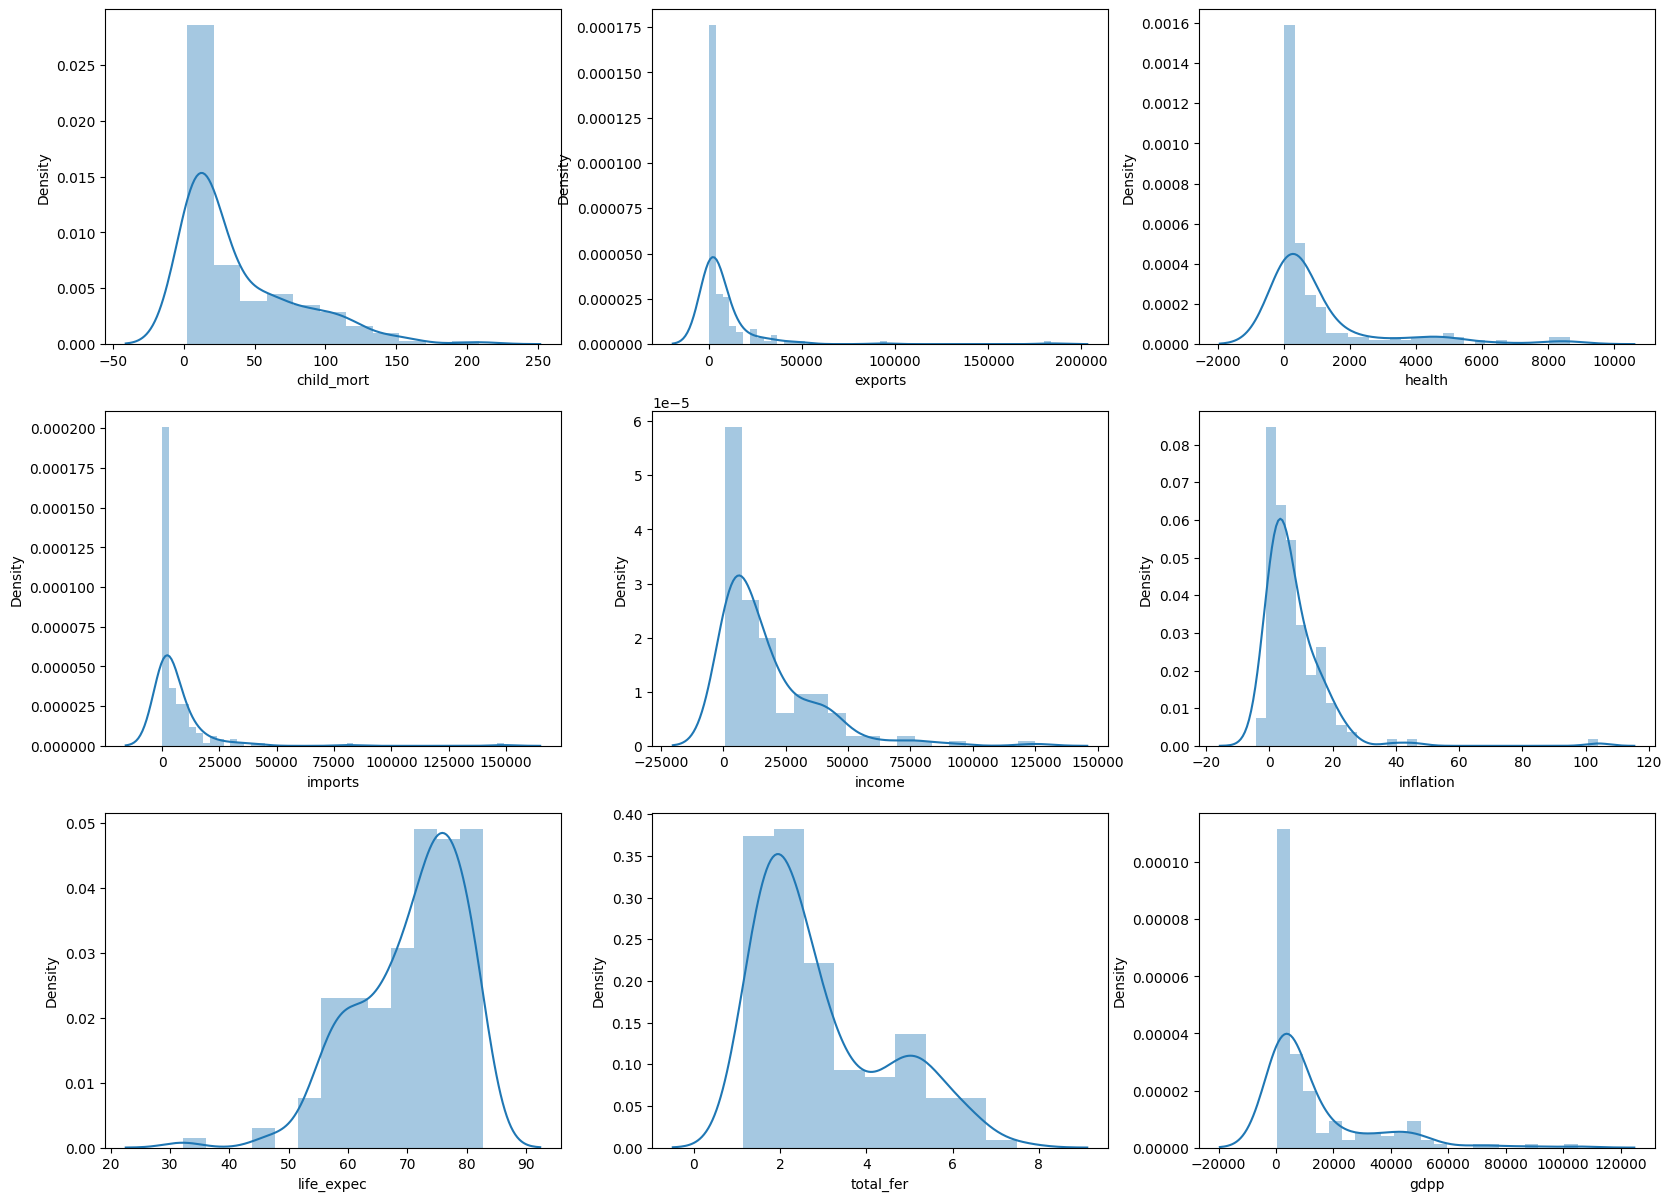

In [48]:
plt.figure(figsize = (20,20))
features=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(ngo[i[1]])

In [51]:
Q3 = ngo.exports.quantile(0.95)
Q1 = ngo.exports.quantile(0.05)
ngo['exports'][ngo['exports']<=Q1]=Q1
ngo['exports'][ngo['exports']>=Q3]=Q3

Q3 = ngo.imports.quantile(0.95)
Q1 = ngo.imports.quantile(0.05)
ngo['imports'][ngo['imports']<=Q1]=Q1
ngo['imports'][ngo['imports']>=Q3]=Q3

Q3 = ngo.health.quantile(0.95)
Q1 = ngo.health.quantile(0.05)
ngo['health'][ngo['health']<=Q1]=Q1
ngo['health'][ngo['health']>=Q3]=Q3

Q3 = ngo.income.quantile(0.95)
Q1 = ngo.income.quantile(0.05)
ngo['income'][ngo['income']<=Q1]=Q1
ngo['income'][ngo['income']>=Q3]=Q3

Q3 = ngo.inflation.quantile(0.95)
Q1 = ngo.inflation.quantile(0.05)
ngo['inflation'][ngo['inflation']<=Q1]=Q1
ngo['inflation'][ngo['inflation']>=Q3]=Q3

Q3 = ngo.life_expec.quantile(0.95)
Q1 = ngo.life_expec.quantile(0.05)
ngo['life_expec'][ngo['life_expec']<=Q1]=Q1
ngo['life_expec'][ngo['life_expec']>=Q3]=Q3

Q3 = ngo.child_mort.quantile(0.95)
Q1 = ngo.child_mort.quantile(0.05)
ngo['child_mort'][ngo['child_mort']<=Q1]=Q1
ngo['child_mort'][ngo['child_mort']>=Q3]=Q3

Q3 = ngo.total_fer.quantile(0.95)
Q1 = ngo.total_fer.quantile(0.05)
ngo['total_fer'][ngo['total_fer']<=Q1]=Q1
ngo['total_fer'][ngo['total_fer']>=Q3]=Q3

Q3 = ngo.gdpp.quantile(0.95)
Q1 = ngo.gdpp.quantile(0.05)
ngo['gdpp'][ngo['gdpp']<=Q1]=Q1
ngo['gdpp'][ngo['gdpp']>=Q3]=Q3

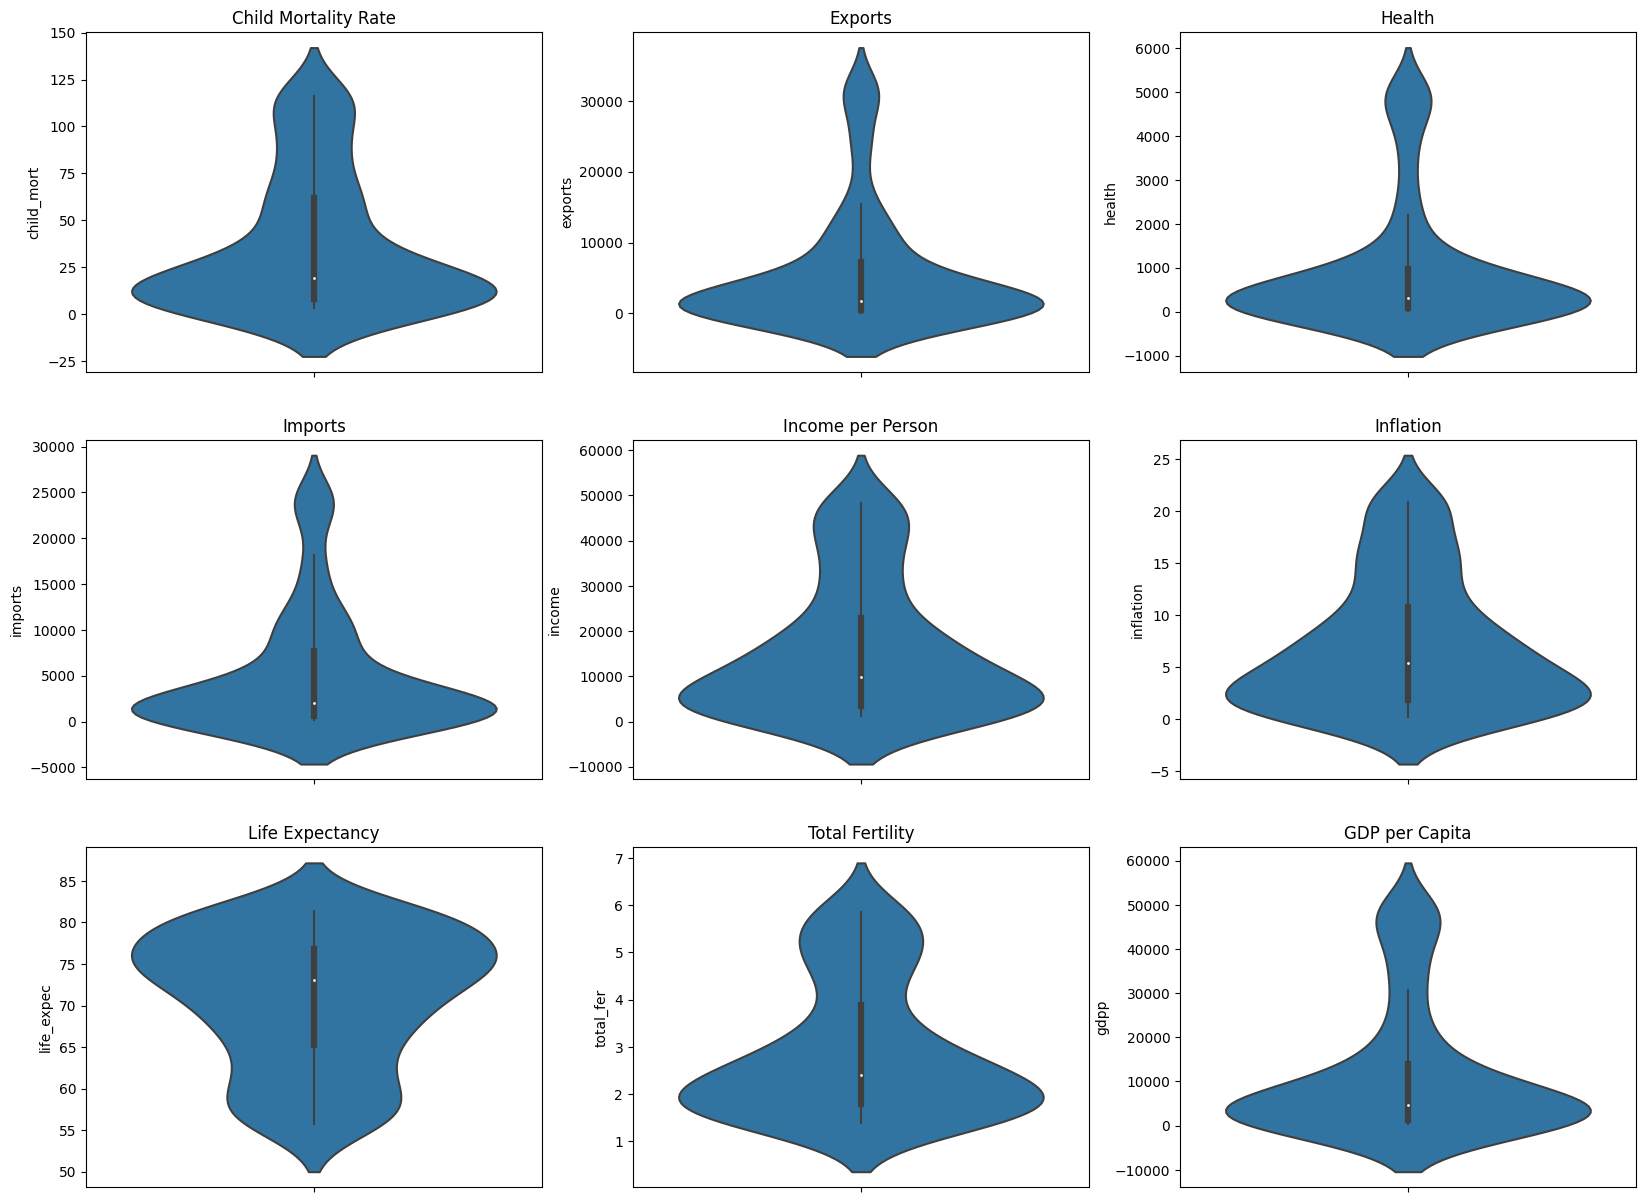

In [52]:
f, axes = plt.subplots(3, 3, figsize=(20, 15))
s=sns.violinplot(y=ngo.child_mort,ax=axes[0, 0])
axes[0, 0].set_title('Child Mortality Rate')
s=sns.violinplot(y=ngo.exports,ax=axes[0, 1])
axes[0, 1].set_title('Exports')
s=sns.violinplot(y=ngo.health,ax=axes[0, 2])
axes[0, 2].set_title('Health')

s=sns.violinplot(y=ngo.imports,ax=axes[1, 0])
axes[1, 0].set_title('Imports')
s=sns.violinplot(y=ngo.income,ax=axes[1, 1])
axes[1, 1].set_title('Income per Person')
s=sns.violinplot(y=ngo.inflation,ax=axes[1, 2])
axes[1, 2].set_title('Inflation')

s=sns.violinplot(y=ngo.life_expec,ax=axes[2, 0])
axes[2, 0].set_title('Life Expectancy')
s=sns.violinplot(y=ngo.total_fer,ax=axes[2, 1])
axes[2, 1].set_title('Total Fertility')
s=sns.violinplot(y=ngo.gdpp,ax=axes[2, 2])
axes[2, 2].set_title('GDP per Capita')
s.get_figure().savefig('boxplot subplots.png')
plt.show()

In [53]:
# Dropping Country field as final dataframe will only contain data columns

ngo_drop = ngo.copy()
country = ngo_drop.pop('country')

Standardization / Normalization

In [54]:
# Standarisation technique for scaling
scaler = StandardScaler()
ngo_scaled = scaler.fit_transform(ngo_drop)

In [55]:
ngo_df = pd.DataFrame(ngo_scaled, columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'])
ngo_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0  1.479588   -0.668039 -0.629778 -0.733291 -0.960575  0.387667  -1.825310     
1 -0.560024   -0.542389 -0.473807 -0.472674 -0.395590 -0.404004   0.682454     
2 -0.263504   -0.476048 -0.530344 -0.560668 -0.193907  1.452825   0.707406     
3  2.194560   -0.419165 -0.589272 -0.543598 -0.669255  2.215708  -1.338729     
4 -0.734610   -0.027297 -0.150953  0.306143  0.227115 -0.891802   0.744836     

   total_fer      gdpp  
0  2.020718  -0.757874  
1 -0.887331  -0.523775  
2 -0.022587  -0.499286  
3  2.049310  -0.560839  
4 -0.552591   0.012991

**K-Means Clustering**

*Elbow Method to find right number of Clusters*

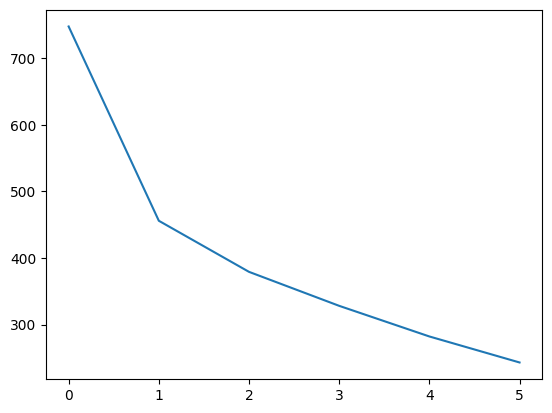

In [56]:
ssd = []
for num_clusters in list(range(2,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(ngo_df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd);

It seems good to choose 3 clusters

*Silhoutte Analysis*

In [57]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(ngo_df)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(ngo_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.48447902987180524
For n_clusters=3, the silhouette score is 0.4203919640787207
For n_clusters=4, the silhouette score is 0.3832442500525417
For n_clusters=5, the silhouette score is 0.2994963024128736
For n_clusters=6, the silhouette score is 0.30307244388683313
For n_clusters=7, the silhouette score is 0.3301983269977131
For n_clusters=8, the silhouette score is 0.3432577893986419


it also seems good to take clusters = 3

In [58]:
cluster = KMeans(n_clusters=3, max_iter=150, random_state= 50)
cluster.fit(ngo_df)

KMeans(max_iter=150, n_clusters=3, random_state=50)

In [59]:
cluster.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [60]:
ngo['Cluster_Id'] = cluster.labels_
ngo.head()

country  child_mort    exports    health   imports   income  \
0  Afghanistan          90.2        70.4688    41.9174   248.297   1610.0    
1  Albania              16.6        1145.2000  267.8950  1987.740  9930.0    
2  Algeria              27.3        1712.6400  185.9820  1400.440  12900.0   
3  Angola               116.0       2199.1900  100.6050  1514.370  5900.0    
4  Antigua and Barbuda  10.3        5551.0000  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer     gdpp  Cluster_Id  
0  9.44       56.2        5.820      553.0    2           
1  4.49       76.3        1.650      4090.0   0           
2  16.10      76.5        2.890      4460.0   0           
3  20.87      60.1        5.861      3530.0   2           
4  1.44       76.8        2.130      12200.0  0

In [61]:
ngo.Cluster_Id.value_counts(ascending=True)

1    37
2    48
0    82
Name: Cluster_Id, dtype: int64

*From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters*

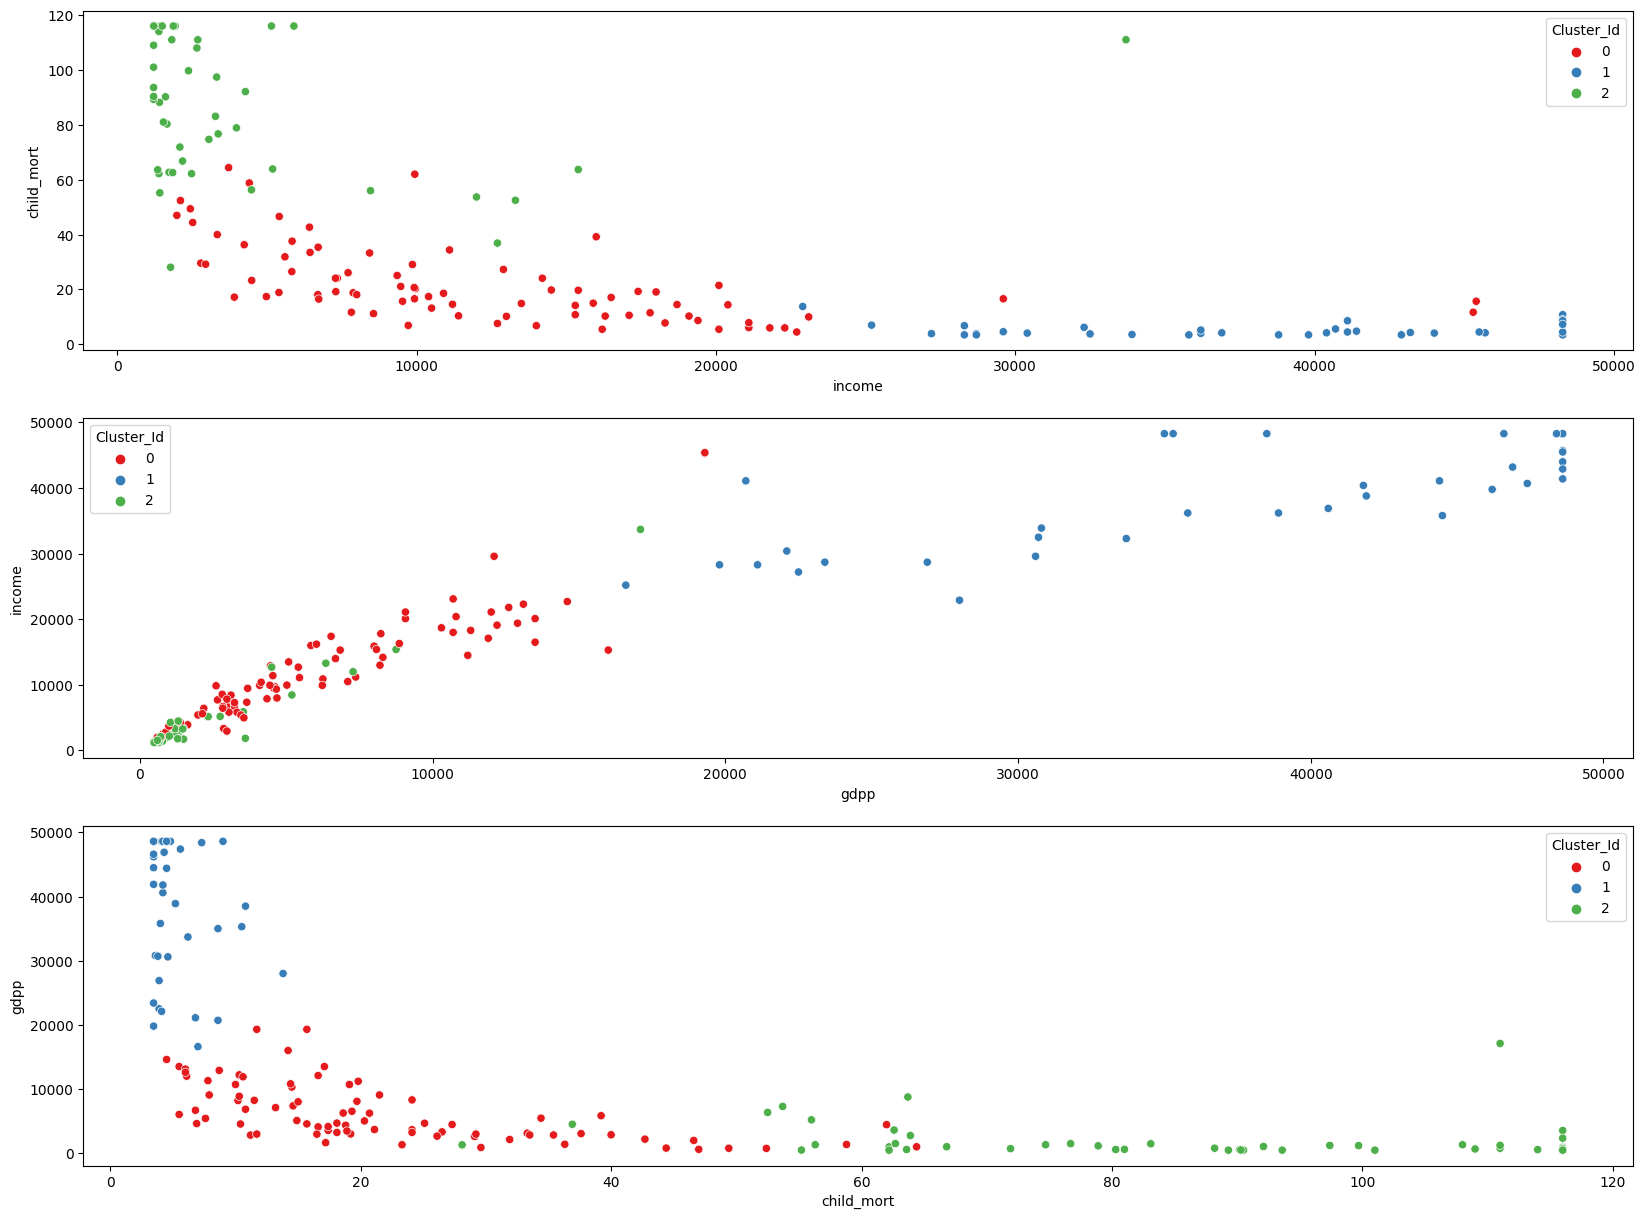

In [93]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = ngo,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = ngo,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=ngo,legend='full',palette="Set1")
plt.savefig('Clusters.png')
plt.show()

0 -> Developing Countries

1 -> Developed Countries

2 -> Least Developed Countries

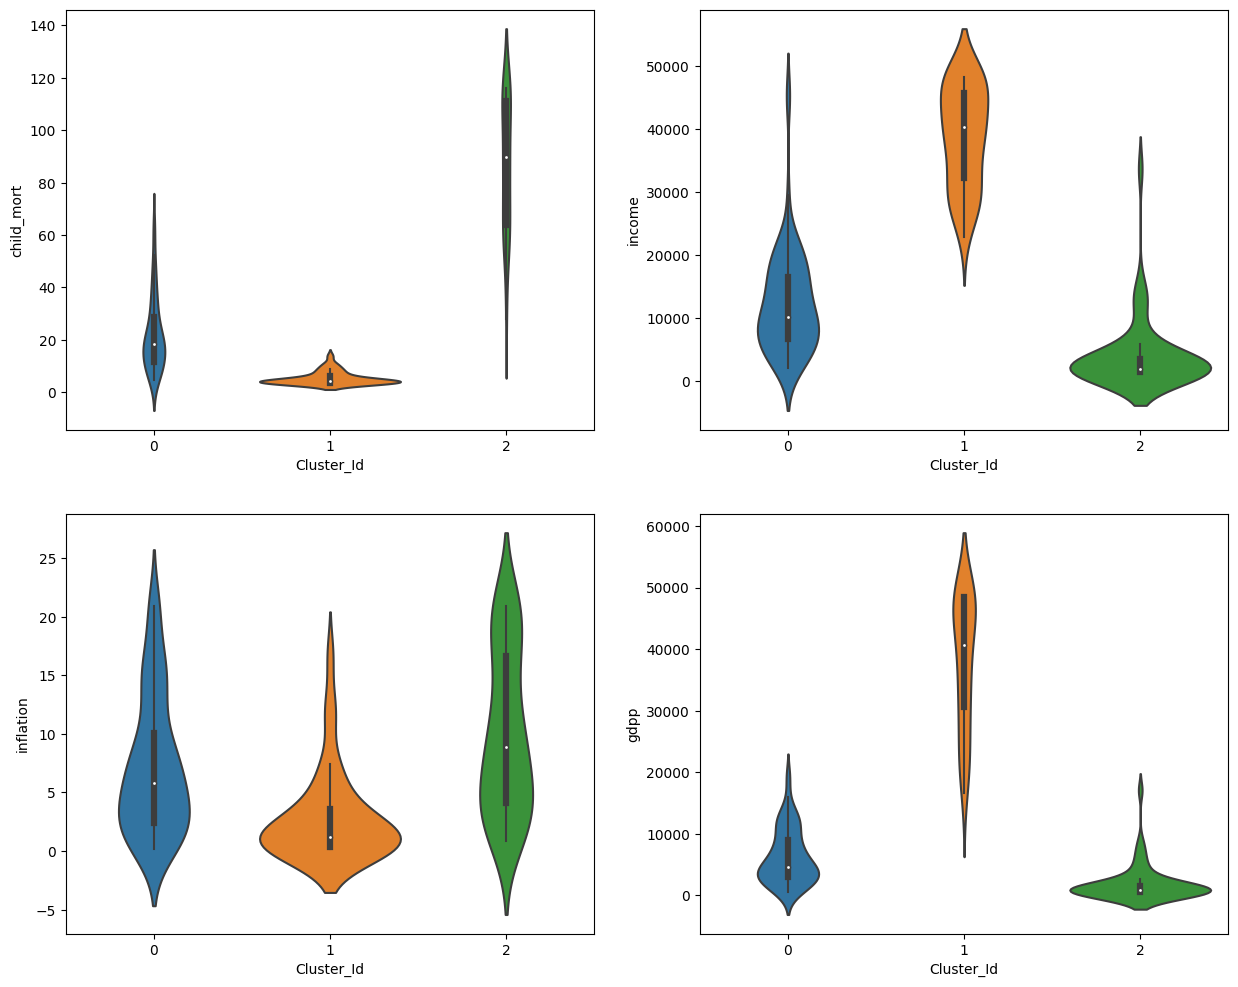

In [64]:
 #Violin plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_Id', y = 'child_mort', data = ngo,ax=axes[0][0])
sns.violinplot(x = 'Cluster_Id', y = 'income', data = ngo,ax=axes[0][1])
sns.violinplot(x = 'Cluster_Id', y = 'inflation', data=ngo,ax=axes[1][0])
sns.violinplot(x = 'Cluster_Id', y = 'gdpp', data=ngo,ax=axes[1][1])
plt.show()

The above plots analysis clears shows the difference between three clusters

**Cluster Profiling**

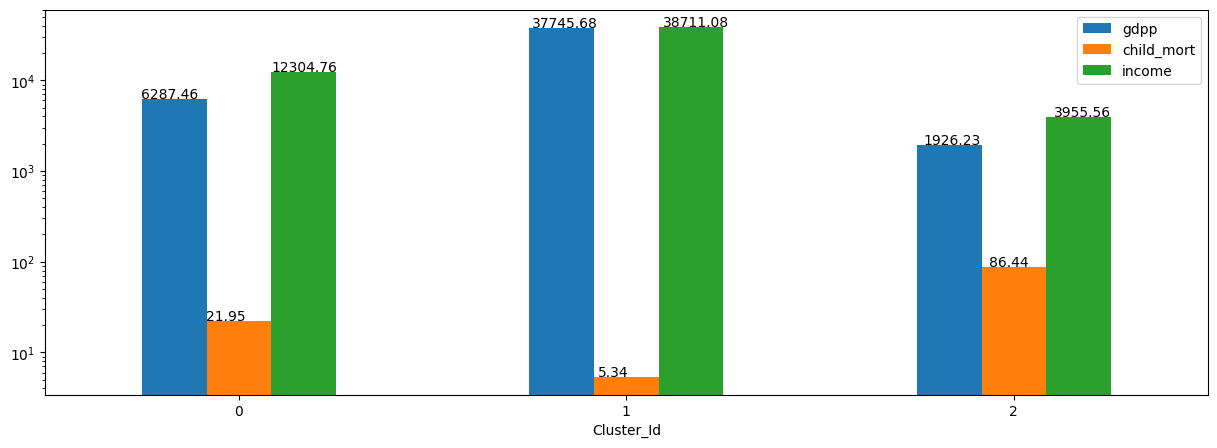

In [65]:
ax=ngo[['gdpp','child_mort','income','Cluster_Id']].groupby('Cluster_Id').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.show()

In [68]:
ngo[ngo['Cluster_Id']==1].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developed countries as per UN & IMF

country  child_mort  exports   health  imports   income  inflation  \
10   Bahamas  13.8        9800.0   2209.20  12236.0  22900.0  0.1834      
82   Kuwait   10.8        25679.5  1012.55  11704.0  48290.0  11.2000     
23   Brunei   10.5        23792.2  1002.52  9884.0   48290.0  16.7000     
123  Qatar    9.0         31385.1  1272.43  16731.4  48290.0  6.9800      
11   Bahrain  8.6         14386.5  1028.79  10536.3  41100.0  7.4400      

     life_expec  total_fer     gdpp  Cluster_Id  
10   73.8        1.86       28000.0  1           
82   78.2        2.21       38500.0  1           
23   77.1        1.84       35300.0  1           
123  79.5        2.07       48610.0  1           
11   76.0        2.16       20700.0  1

In [69]:
ngo[ngo['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

# They are Least developed countries as per UN & IMF

country  child_mort   exports    health  imports  \
31   Central African Republic  116.0       70.4688   26.71592  169.281   
37   Congo, Dem. Rep.          116.0       137.2740  26.71592  169.281   
112  Niger                     116.0       77.2560   26.71592  170.868   
132  Sierra Leone              116.0       70.4688   52.26900  169.281   
25   Burkina Faso              116.0       110.4000  38.75500  170.200   

     income  inflation  life_expec  total_fer   gdpp  Cluster_Id  
31   1213.0  2.01       55.78       5.210      465.9  2           
37   1213.0  20.80      57.50       5.861      465.9  2           
112  1213.0  2.55       58.80       5.861      465.9  2           
132  1220.0  17.20      55.78       5.200      465.9  2           
25   1430.0  6.81       57.90       5.861      575.0  2

In [70]:
ngo[ngo['Cluster_Id']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developing countries as per UN & IMF

country  child_mort    exports     health   imports  income  \
107  Myanmar       64.4        70.4688    26.71592   169.281   3720.0   
154  Turkmenistan  62.0        3387.7200  111.00000  1975.800  9940.0   
69   India         58.8        305.1000   54.67500   365.850   4410.0   
146  Tajikistan    52.4        109.9620   44.13240   432.468   2110.0   
12   Bangladesh    49.4        121.2800   26.71592   169.281   2440.0   

     inflation  life_expec  total_fer    gdpp  Cluster_Id  
107  7.04       66.8        2.41       988.0   0           
154  2.31       67.9        2.83       4440.0  0           
69   8.98       66.2        2.60       1350.0  0           
146  12.50      69.6        3.51       738.0   0           
12   7.14       70.4        2.33       758.0   0

In [71]:
FinalListbyKMean=ngo[ngo['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
FinalListbyKMean['country']
FinalListbyKMean.reset_index(drop=True).country[:5]

0    Central African Republic
1    Congo, Dem. Rep.        
2    Niger                   
3    Sierra Leone            
4    Burkina Faso            
Name: country, dtype: object

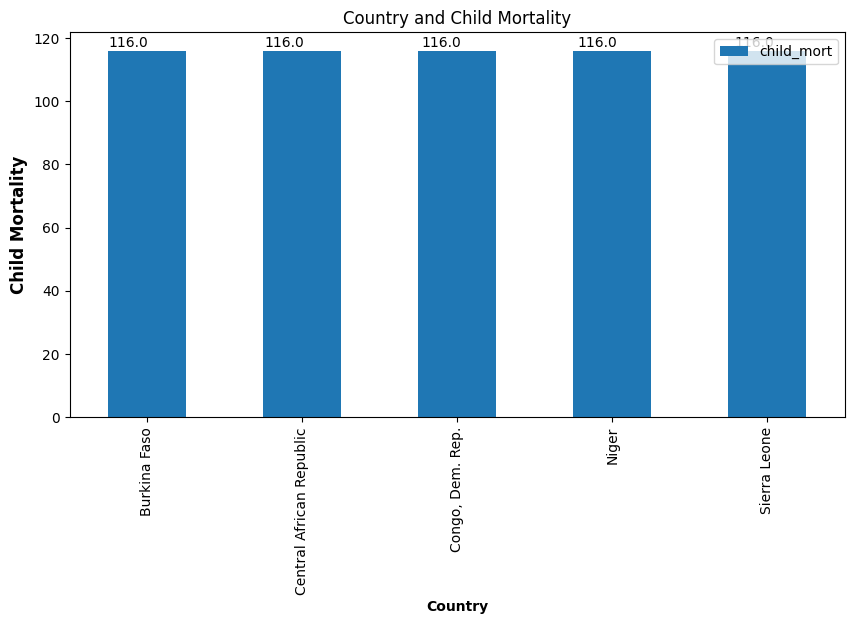

In [94]:
# BarPlot for Child Mortality of countries which are in need of aid
df_list_cm = pd.DataFrame(FinalListbyKMean.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
ax=df_list_cm.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.savefig('direneeds_childmort.png')
plt.show()

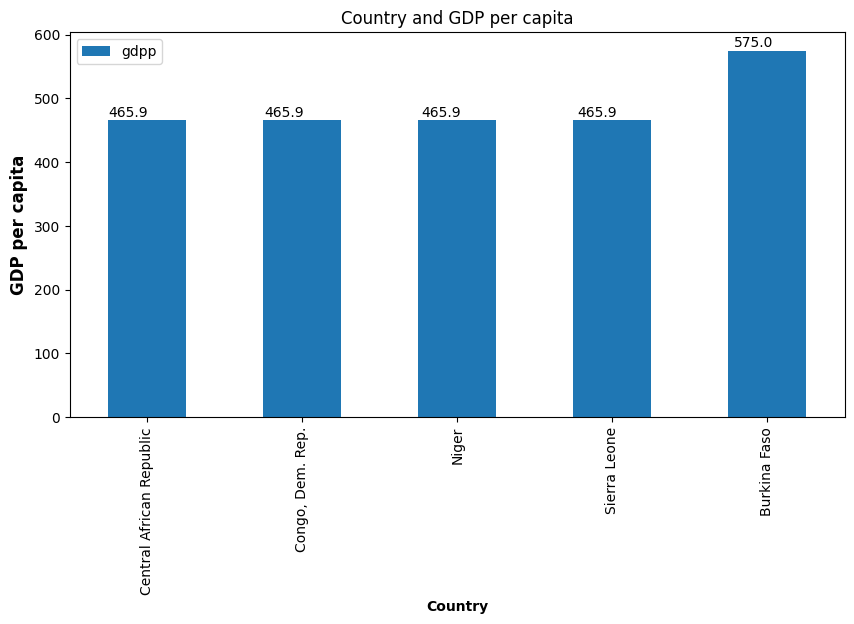

In [95]:
df_list_gdp =pd.DataFrame(FinalListbyKMean.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
ax=df_list_gdp.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.savefig('gdppc_direneeds.png')
plt.show()

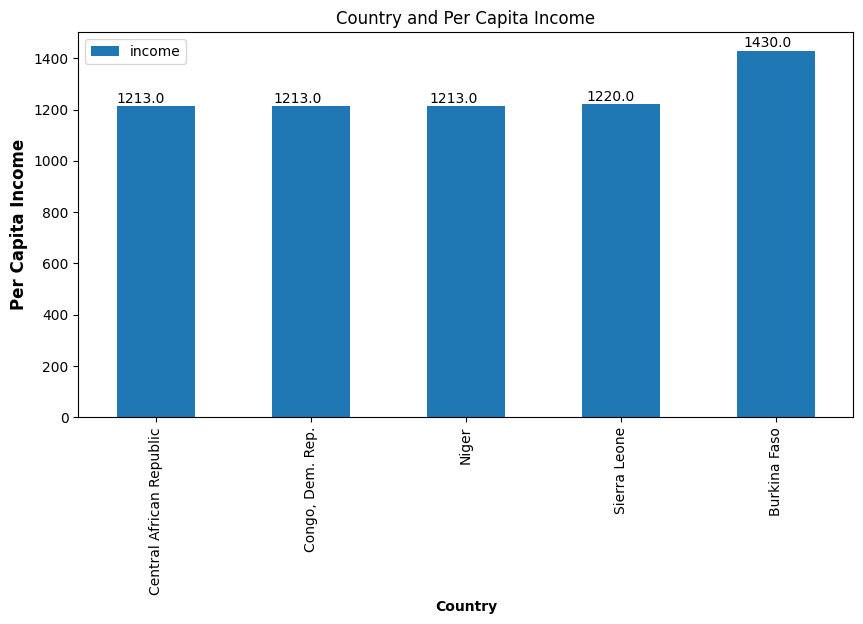

In [96]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(FinalListbyKMean.groupby(['country'])['income'].mean().sort_values(ascending = True))
ax=df_list_in.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.savefig('per_capita_income.png')
plt.show()

**Hierarchical Clustering**

In [75]:
ngo_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0  1.479588   -0.668039 -0.629778 -0.733291 -0.960575  0.387667  -1.825310     
1 -0.560024   -0.542389 -0.473807 -0.472674 -0.395590 -0.404004   0.682454     
2 -0.263504   -0.476048 -0.530344 -0.560668 -0.193907  1.452825   0.707406     
3  2.194560   -0.419165 -0.589272 -0.543598 -0.669255  2.215708  -1.338729     
4 -0.734610   -0.027297 -0.150953  0.306143  0.227115 -0.891802   0.744836     

   total_fer      gdpp  
0  2.020718  -0.757874  
1 -0.887331  -0.523775  
2 -0.022587  -0.499286  
3  2.049310  -0.560839  
4 -0.552591   0.012991

*Single Linkage*

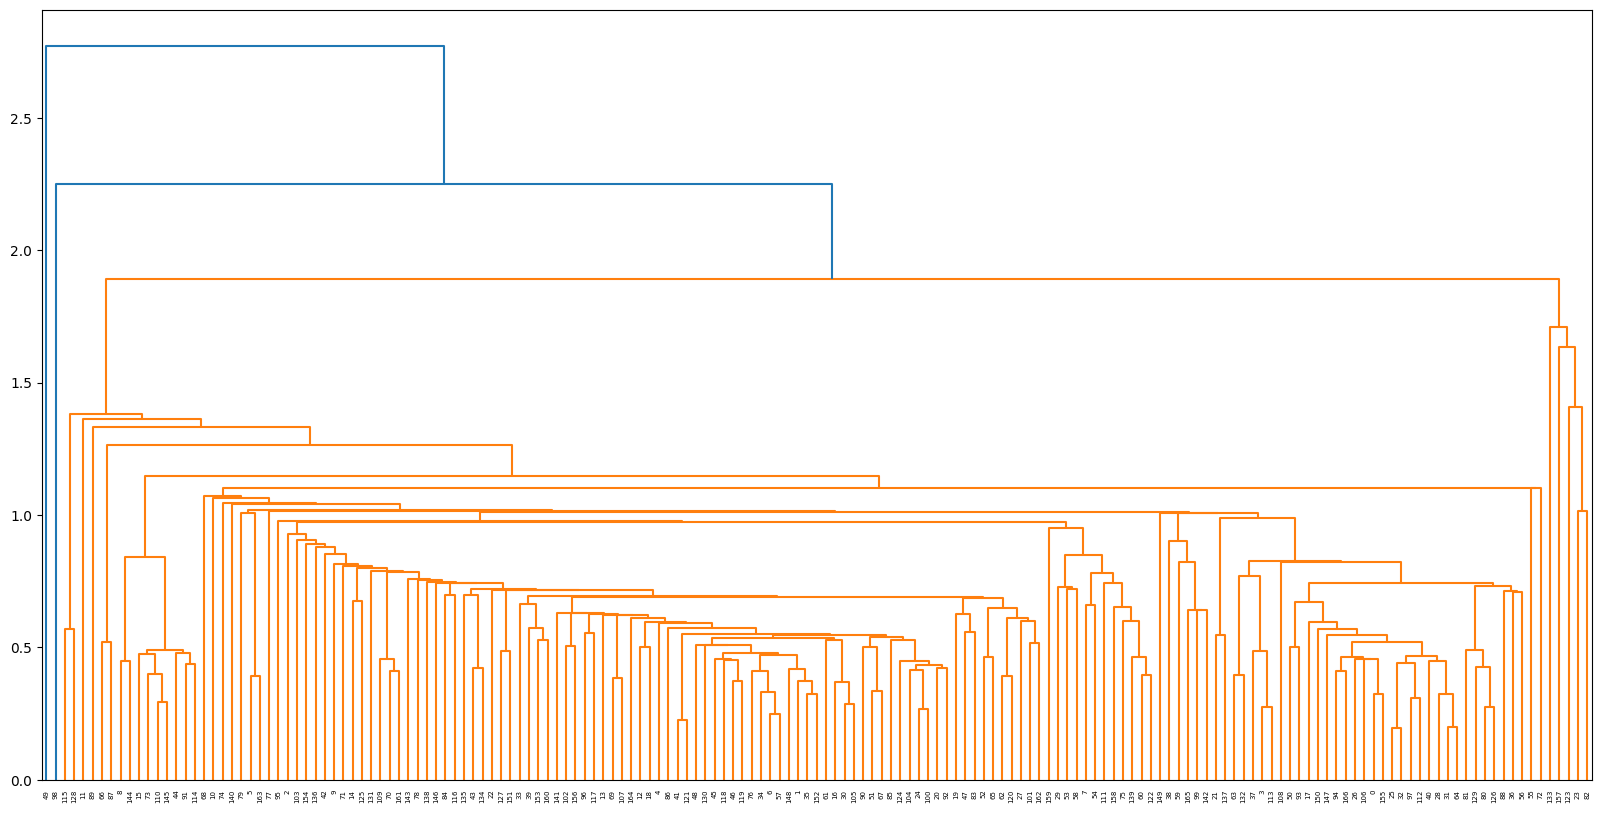

In [77]:
# Single linkage
plt.figure(figsize = (20,10))
mergings = linkage(ngo_df, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

*Complete Linkage*

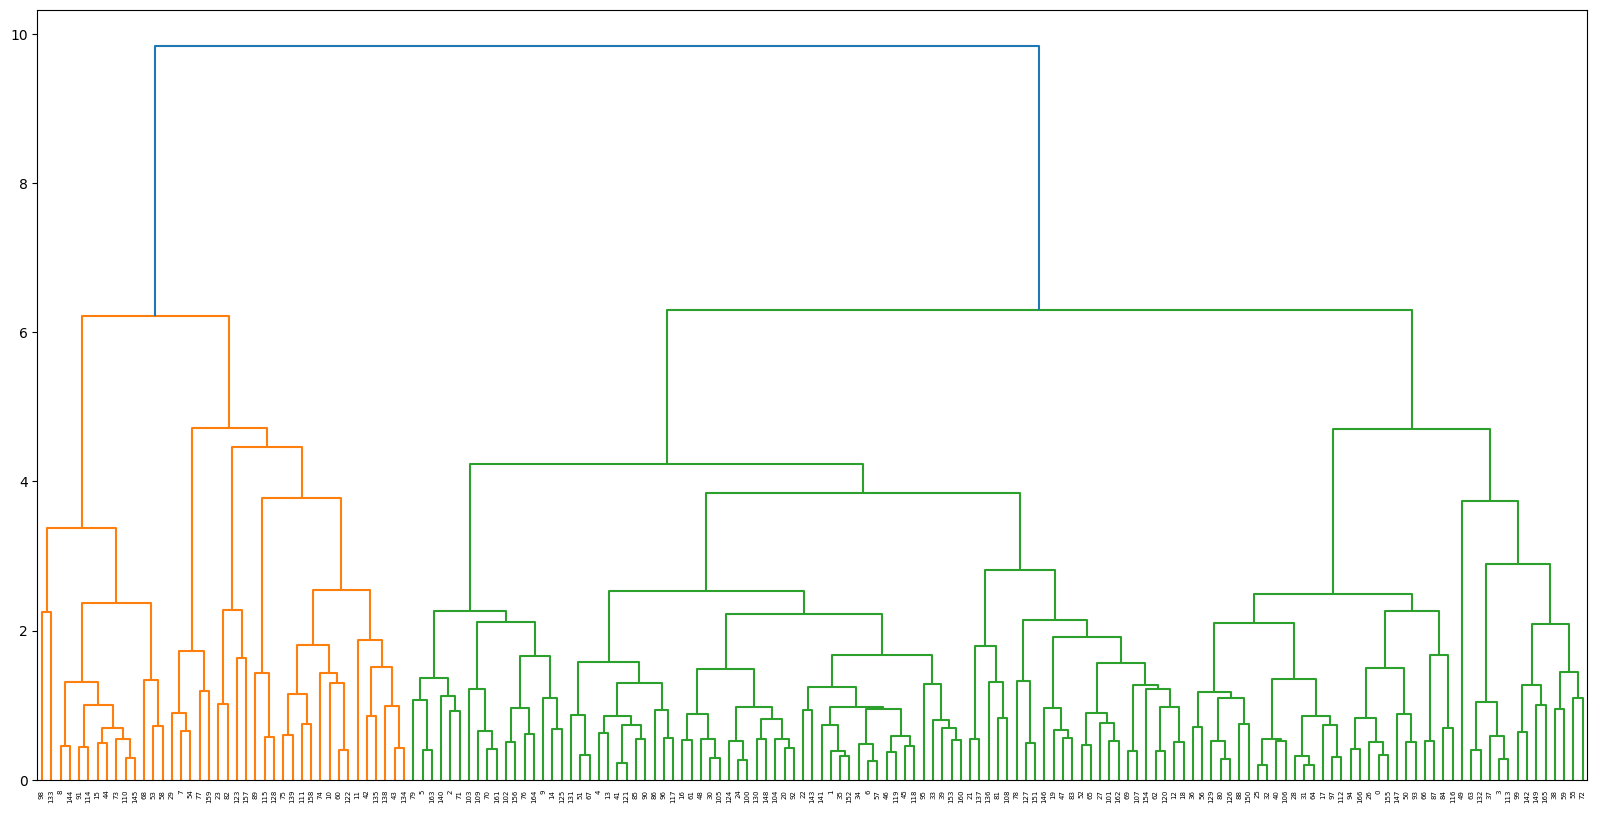

In [97]:
# Complete Linkage
plt.figure(figsize = (20,10))
mergings = linkage(ngo_df, method='complete',metric='euclidean')
dendrogram(mergings)
plt.savefig('dendogram.png')
plt.show()

In [80]:
df_hc = ngo.copy()
df_hc = df_hc.drop('Cluster_Id',axis=1)
df_hc.head()

country  child_mort    exports    health   imports   income  \
0  Afghanistan          90.2        70.4688    41.9174   248.297   1610.0    
1  Albania              16.6        1145.2000  267.8950  1987.740  9930.0    
2  Algeria              27.3        1712.6400  185.9820  1400.440  12900.0   
3  Angola               116.0       2199.1900  100.6050  1514.370  5900.0    
4  Antigua and Barbuda  10.3        5551.0000  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer     gdpp  
0  9.44       56.2        5.820      553.0    
1  4.49       76.3        1.650      4090.0   
2  16.10      76.5        2.890      4460.0   
3  20.87      60.1        5.861      3530.0   
4  1.44       76.8        2.130      12200.0

In [81]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [82]:
# assign cluster labels
df_hc['Cluster_labels'] = cluster_labels
df_hc.head()

country  child_mort    exports    health   imports   income  \
0  Afghanistan          90.2        70.4688    41.9174   248.297   1610.0    
1  Albania              16.6        1145.2000  267.8950  1987.740  9930.0    
2  Algeria              27.3        1712.6400  185.9820  1400.440  12900.0   
3  Angola               116.0       2199.1900  100.6050  1514.370  5900.0    
4  Antigua and Barbuda  10.3        5551.0000  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer     gdpp  Cluster_labels  
0  9.44       56.2        5.820      553.0    0               
1  4.49       76.3        1.650      4090.0   1               
2  16.10      76.5        2.890      4460.0   1               
3  20.87      60.1        5.861      3530.0   0               
4  1.44       76.8        2.130      12200.0  1

In [83]:
## Number of countries in each cluster
df_hc.Cluster_labels.value_counts(ascending=True
                                  )

2    40
0    43
1    84
Name: Cluster_labels, dtype: int64

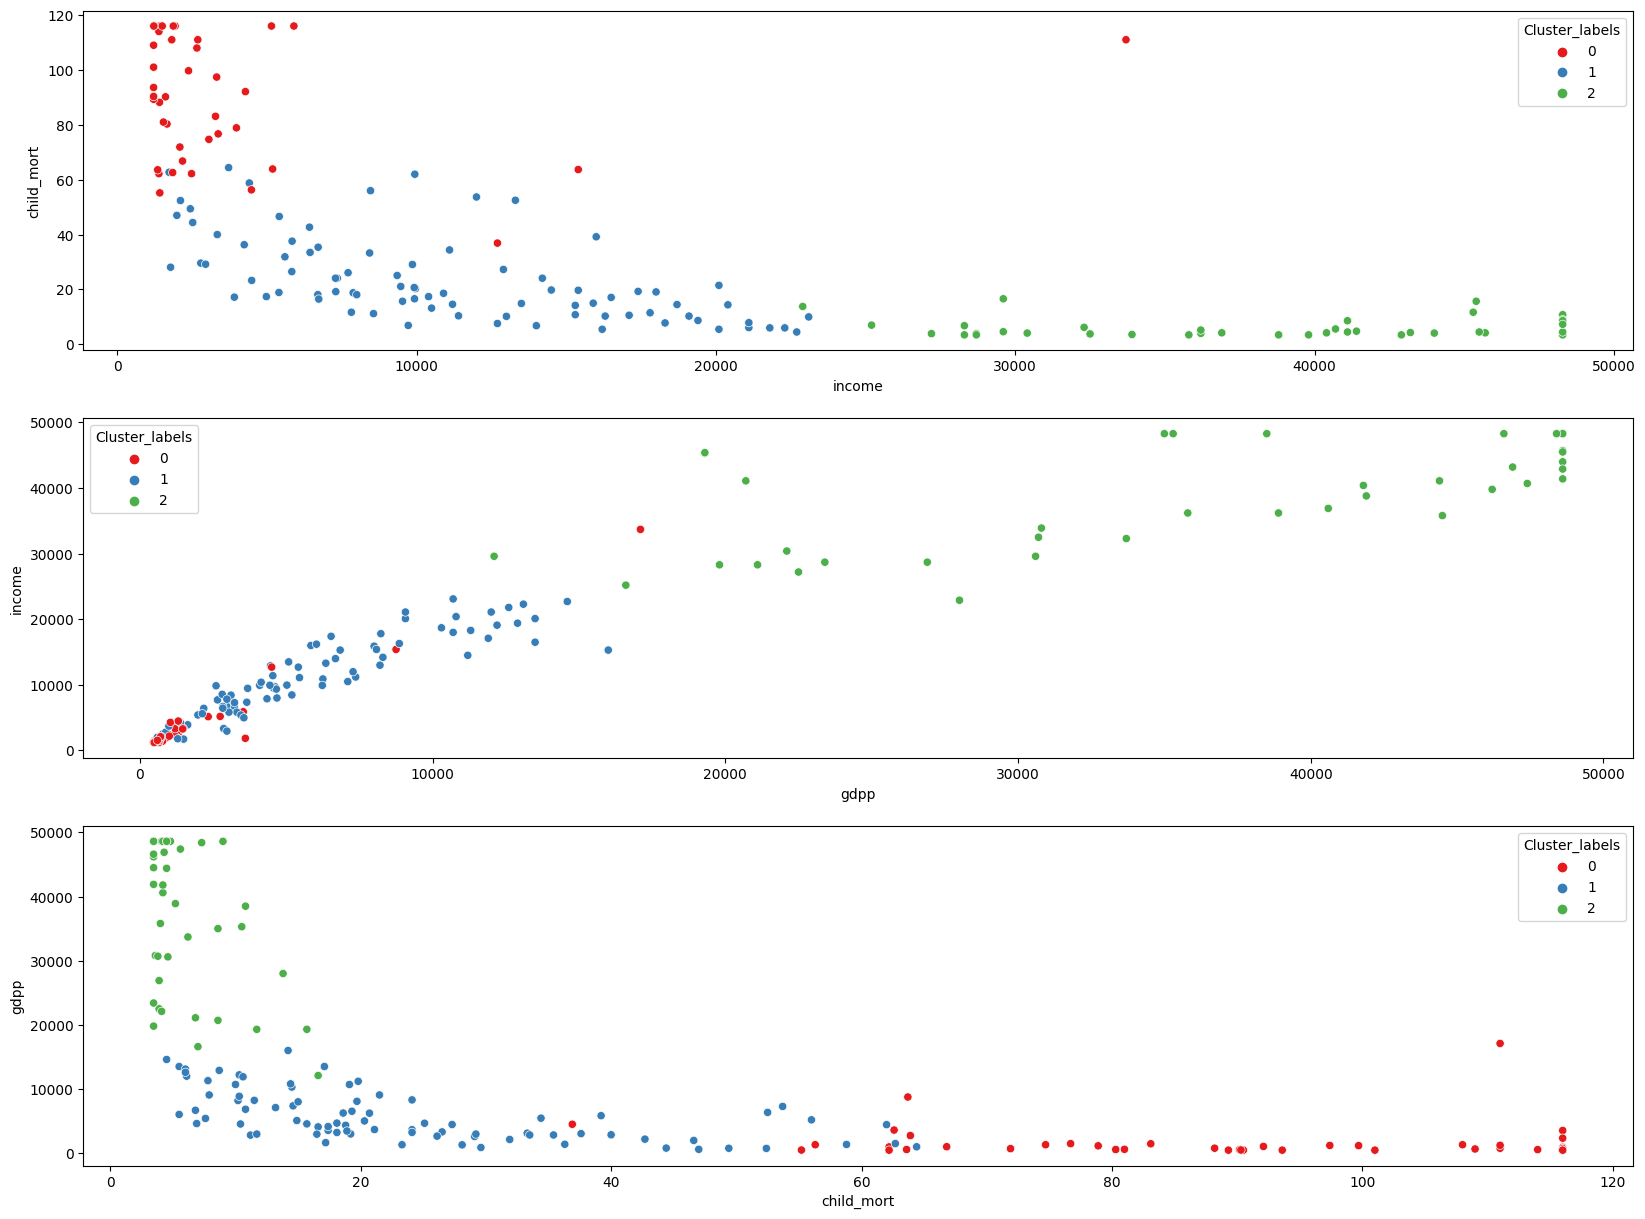

In [84]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_labels',data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_labels', data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_labels', data=df_hc,legend='full',palette="Set1")
plt.show()

Clustering seems to be good

In [85]:
df_hc[df_hc['Cluster_labels']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developed countries as per UN & IMF

country  child_mort  exports   health  imports   income  inflation  \
89   Libya         16.6        7937.6   469.48   5094.1   29600.0  14.2000     
128  Saudi Arabia  15.7        9572.8   827.97   6369.0   45400.0  17.2000     
10   Bahamas       13.8        9800.0   2209.20  12236.0  22900.0  0.1834      
115  Oman          11.7        12680.1  534.61   7951.6   45300.0  15.6000     
82   Kuwait        10.8        25679.5  1012.55  11704.0  48290.0  11.2000     

     life_expec  total_fer     gdpp  Cluster_labels  
89   76.1        2.41       12100.0  2               
128  75.1        2.96       19300.0  2               
10   73.8        1.86       28000.0  2               
115  76.1        2.90       19300.0  2               
82   78.2        2.21       38500.0  2

In [86]:
df_hc[df_hc['Cluster_labels']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Least developed countries as per UN & IMF

country  child_mort   exports    health  imports  \
31   Central African Republic  116.0       70.4688   26.71592  169.281   
37   Congo, Dem. Rep.          116.0       137.2740  26.71592  169.281   
112  Niger                     116.0       77.2560   26.71592  170.868   
132  Sierra Leone              116.0       70.4688   52.26900  169.281   
25   Burkina Faso              116.0       110.4000  38.75500  170.200   

     income  inflation  life_expec  total_fer   gdpp  Cluster_labels  
31   1213.0  2.01       55.78       5.210      465.9  0               
37   1213.0  20.80      57.50       5.861      465.9  0               
112  1213.0  2.55       58.80       5.861      465.9  0               
132  1220.0  17.20      55.78       5.200      465.9  0               
25   1430.0  6.81       57.90       5.861      575.0  0

In [87]:
df_hc[df_hc['Cluster_labels']==1].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developing countries as per UN & IMF

country  child_mort    exports     health   imports  income  \
107  Myanmar       64.4        70.4688    26.71592   169.281   3720.0   
81   Kiribati      62.7        198.1700   168.37000  1190.510  1730.0   
154  Turkmenistan  62.0        3387.7200  111.00000  1975.800  9940.0   
69   India         58.8        305.1000   54.67500   365.850   4410.0   
108  Namibia       56.0        2480.8200  351.88200  3150.330  8460.0   

     inflation  life_expec  total_fer    gdpp  Cluster_labels  
107  7.04       66.8        2.41       988.0   1               
81   1.52       60.7        3.84       1490.0  1               
154  2.31       67.9        2.83       4440.0  1               
69   8.98       66.2        2.60       1350.0  1               
108  3.56       58.6        3.60       5190.0  1

In [88]:
FinalListbyHC=df_hc[df_hc['Cluster_labels']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
FinalListbyHC['country']
FinalListbyHC.reset_index(drop=True).country[:5]

0    Central African Republic
1    Congo, Dem. Rep.        
2    Niger                   
3    Sierra Leone            
4    Burkina Faso            
Name: country, dtype: object

**Final Analysis**

In [89]:
# Number of countries in each cluster in K-Means
ngo.Cluster_Id.value_counts(ascending=True)

1    37
2    48
0    82
Name: Cluster_Id, dtype: int64

In [90]:
# Number of countries in each cluster for Hierarchical clustering
df_hc.Cluster_labels.value_counts(ascending=True)

2    40
0    43
1    84
Name: Cluster_labels, dtype: int64

Though Required Clusters have same number of countries, but for Hierarchical clustering has more execution time compared to K-Mean

K-mean is an ideal algorithm for this problem statement

**Conclusion**

In [91]:
FinalListbyKMean.reset_index(drop=True).country

0    Central African Republic
1    Congo, Dem. Rep.        
2    Niger                   
3    Sierra Leone            
4    Burkina Faso            
Name: country, dtype: object

In [92]:
FinalListbyHC.reset_index(drop=True).country

0    Central African Republic
1    Congo, Dem. Rep.        
2    Niger                   
3    Sierra Leone            
4    Burkina Faso            
Name: country, dtype: object

Identified few factors like child mortality, income etc which plays a vital role in deciding the development status of the country and builded clusters of countries based on that. Based on those clusters identified the above list of countries which are in dire need of aid.